# **Comparing signifigance between jet and ENSO with precipitation in California.**

Referenced articles:

"Seasonal Noise Versus Subseasonal Signal: Forecasts of California Precipitation During the Unusual Winters of 2015-2016 and 2016-2017" Shuguang Wang, Alek Anichowski, Michael Tippett, Adam Sobel

"What is the variability in US west coast winter precipitation during strong El Niño events" Arun Kumar, Mingyue Chen 


## Motivation & Introduction: 

In 2016, high measures of El Nino 3.4 indicated increased precipiation for the state of California. At the time California has been suffering from a drought, thus predictions for increased precipitation gave hope for the end of the drought. However California's 2016 winter did not recieve nearly as much rainfall as predicted. The persistant drought lead to issues in agriculture as well as forest fires. Two papers have looked at what may have caused this misprediction:  
 -  "What is the variability in US west coast winter precipitation during strong El Niño events" Arun Kumar, Mingyue Chen 
    - Looked at variability in Precipiation/El Nino 3.4 regression and noted that the high levels of variation could lessen the reliability of precipiation predictions based on El Nino. (Great deal of noise when making predictions) 
    
- "Seasonal Noise Versus Subseasonal Signal: Forecasts of California Precipitation During the Unusual Winters of 2015-2016 and 2016-2017" Shuguang Wang, Alek Anichowski, Michael Tippett, Adam Sobel
    - Compared effect of wind on precipiation to El Nino 3.4 on precipiation, found that wind may be a larger factor to consider than EL Nino 3.4 

In this project we intend to extend the work done by Wang et al. and Kumar et al. This extension will consist of computing correlations and partial correlations,and  F-tests with bivariate regression. We will use Forecast data as well as observational data to complete this analysis. Additionally, we will be looking at the data on a month-by-month basis as opposed to the three month chunks examined in the preciously mentioned. We will focus our analysis on California's wetter months: November, December, January, and February. 
   



## **Data** 

 All Data is taken from the IRI data library
 
### **Precipitation data**: 
NOAA NCEP CEC Unified Precipitation Gauge Continental United States Realtime Rain Precipitation Data (We looked at precipitation both in 1 degree and half degree increments) 

### **El Nino/SST**: 
NOAA NCDC ERSST version5 sst anomalies: Extended reconstructed sea surface temperature data

### **Jet data**:
NOAA NCEP-DOE Reanalysis-2 Monthly pgb ugrdprs zonal wind data



## Results

The results are outlines below:

### Spatial Observational:
- Precipiation maps (cell 7) 
- Correlation maps (cells 9,10,11) 
- Regression maps (cells 112-114)
- F test maps (cells 115-116) 
- Partial Correlation maps (cells 23-26) 


### Temporal Observational:
- California masked data 
    - Wind/Nino 3.4/Precipiation scatter plots (cell 31) 
    - Wind/Nino 3.4/Precipiation boxplots (cells 33-34)
    - Heat Map (cell 35)  
- South West and Pacific NW masked data 
    - Wind/Nino 3.4/Precipiation scatter plots (cells 39-40)
    - Wind/Nino 3.4/Precipiation boxplots (cells 41-43) 
- Precipiation comparison between PNW SW and Ca (cells 45,47) 

### Spatial Forecast: 
- EMC Data
    - Correlation maps (cells 66,67,73) 
    - Partial Correlation maps (cells 72,110) 
- FIM Data 
    - Correlation maps (cel 106)
    - Partial Correlation maps (cells 102 109)




In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import cartopy as ccrs
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
precipurlbymonth="http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.GLOBAL/.v1p0/.extREALTIME/.rain/T/monthlyAverage/T/%28Jan%201979%29/%28Dec%202018%29/RANGE/X/%28130W%29/%28100W%29/RANGE/Y/25/50/RANGE/T/(days%20since%201960-01-01)streamgridunitconvert/dods"
ninourl="http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES/%5BX/Y%5Daverage/zlev/removeGRID/T/%28Jan%201979%29/%28Dec%202018%29/RANGE/yearly-anomalies/T/(days%20since%201960-01-01)streamgridunitconvert/dods"
windurl="http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-DOE/.Reanalysis-2/.Monthly/.pgb/.pgb/.ugrdprs/P/200/VALUE/X/220/240/RANGE/Y/27/40/RANGE/[X/Y]average/SOURCES/.NOAA/.NCEP-DOE/.Reanalysis-2/.Monthly/.pgb/.pgb/.ugrdprs/P/200/VALUE/X/210/240/RANGE/Y/45/60/RANGE/[X/Y]average/sub/P/removeGRID/T/(days%20since%201960-01-01)streamgridunitconvert/dods"

In [3]:
from pathlib import Path

my_file = Path("precip_observational.nc")
if not my_file.is_file():
    !curl "http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.GLOBAL/.v1p0/.extREALTIME/.rain/T/monthlyAverage/T/%28Jan%201979%29/%28Dec%202018%29/RANGE/X/%28130W%29/%28100W%29/RANGE/Y/25/50/RANGE/T/(days%20since%201960-01-01)streamgridunitconvert/1/pop/data.nc" -o "precip_observational.nc"
    
my_file = Path("nino_observational.nc")
if not my_file.is_file():
    !curl "http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES/%5BX/Y%5Daverage/zlev/removeGRID/T/%28Jan%201979%29/%28Dec%202018%29/RANGE/yearly-anomalies/T/(days%20since%201960-01-01)streamgridunitconvert/data.nc" -o "nino_observational.nc"
    
my_file = Path("wind_observational.nc")
if not my_file.is_file():
    !curl "http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-DOE/.Reanalysis-2/.Monthly/.pgb/.pgb/.ugrdprs/P/200/VALUE/X/220/240/RANGE/Y/27/40/RANGE/%5BX/Y%5Daverage/SOURCES/.NOAA/.NCEP-DOE/.Reanalysis-2/.Monthly/.pgb/.pgb/.ugrdprs/P/200/VALUE/X/210/240/RANGE/Y/45/60/RANGE/%5BX/Y%5Daverage/sub/P/removeGRID/T/%28days%20since%201960-01-01%29streamgridunitconvert/data.nc" -o "wind_observational.nc"

In [4]:
precipds=xr.open_dataset("precip_observational.nc")
ninods=xr.open_dataset("nino_observational.nc")
wind = xr.open_dataset("wind_observational.nc")


In [5]:
precipds.rain

<xarray.DataArray 'rain' (T: 480, Y: 52, X: 62)>
[1547520 values with dtype=float32]
Coordinates:
  * X        (X) float32 -130.25 -129.75 -129.25 ... -100.75 -100.25 -99.75
  * Y        (Y) float32 24.75 25.25 25.75 26.25 ... 48.75 49.25 49.75 50.25
  * T        (T) datetime64[ns] 1979-01-16T12:00:00 ... 2018-12-16T12:00:00
Attributes:
    pointwidth:          0
    long_name:           Precipitation
    standard_name:       lwe_precipitation_rate
    file_missing_value:  -999.0
    units:               mm/day
    history:             [(T:  0000 1 Jan 2006 to 0000 21 Apr 2019 appended f...

**Spatial Analysis:**

First we looked at how the data varied spatially on a partial map of the US, on a grid ranging from [25,50] Lat and [-130,-100] Lon, our data spanned from 1977-2018 and produced monthly averages. We focused on the winter months primarily: November,December,January, February (NDJF) 



Precipitation by Month: 

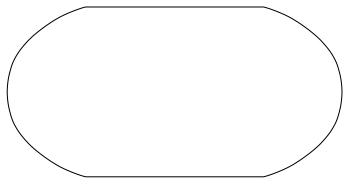

In [6]:
import cartopy.feature as cfeature
def plotmap(data,title,min1,max1,resolution="one",ax=plt.axes(projection=ccrs.crs.Robinson()),colorbar="auto",cmap="nipy_spectral"):
    central_lon, central_lat = -115, 40
    extent = [-130,-100,25, 50]
    ax.set_title(title)
    ax.set_extent(extent)
    ax.gridlines()
    ax.coastlines(resolution='50m')
    ax.add_feature(cfeature.STATES)
    lons, lats = getlonlat(resolution)
    if colorbar=="auto":
        plt.colorbar(cb, cmap, orientation='vertical',ticklocation='auto')
    return ax.contourf(lons, lats, data,transform=ccrs.crs.PlateCarree(),cmap=cmap,vmin=min1,vmax=max1)
def getlonlat(resolution):
    if resolution=="half":
        lats = np.linspace(24.75,50.25, 52)
        lons= np.linspace(-130.25,-99.75,62)
    else:
        lats = np.linspace(24,51, 28)
        lons= np.linspace(-131,-99,33)
    #lons, lats = np.meshgrid(lons, lats)
    return lons, lats

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


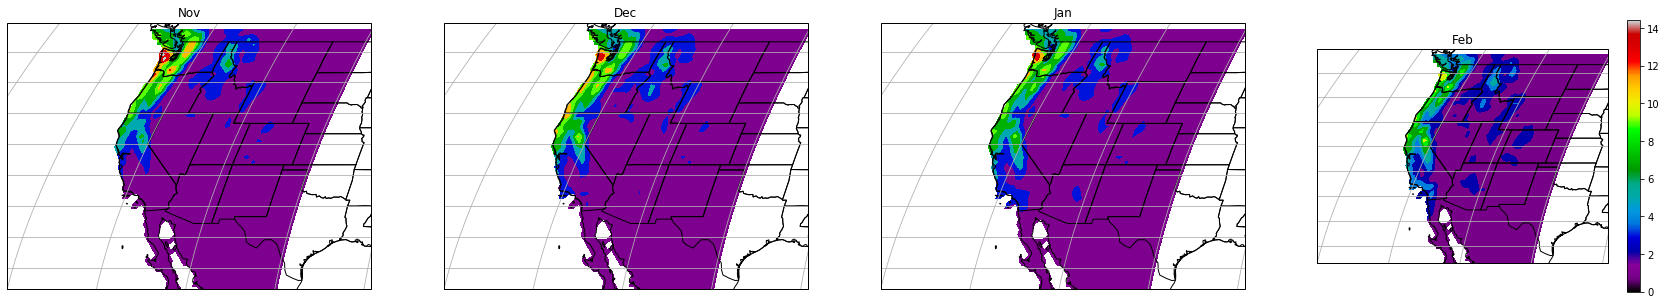

In [7]:
month=["Nov","Dec","Jan","Feb"]
monthnum=[10,11,0,1]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
maxim=np.max(precipds.rain.groupby("T.month").mean("T"))
minim=np.min(precipds.rain.groupby("T.month").mean("T"))
for i,j in enumerate([ax1,ax2,ax3,ax4]):
    plotmap(precipds.rain.groupby("T.month").mean("T")[monthnum[i]],month[i],minim,maxim,"half",ax=j,colorbar="nonauto")
plt.imshow(precipds.rain.groupby("T.month").mean("T")[monthnum[i]],vmin=minim,vmax=maxim,cmap='nipy_spectral')
plt.colorbar()
plt.show()

As you can see, the rainfall is highest along the coasts. There is not a huge difference amonge precipitation amounts month to month however it is clear that southern California appears to get more rain in January and February then in November and December 

Correlation Values:

Correlation is defined as measure of linear relationship between some a and b values: 

$$c=\frac{cov(ab)}{s_{a}s_{b}}$$

We will now examine the correlations between precipitation,wind,sst (all 3 combinations)

Signifigance: 

We will estimate signifigance with the equation (n=40 years):

$$ \frac{2}{\sqrt{n}}=.316$$

In [8]:
precipanom=precipds.groupby('T.month') - precipds.groupby('T.month').mean('T')
Spn=(precipanom.rain*ninods.sst).groupby("T.month").mean("T")
Sn = ninods.sst.groupby('T.month').std('T')
Sp = precipanom.rain.groupby('T.month').std('T')
Cpn = Spn/Sn/Sp
windanom=wind.groupby("T.month")-wind.groupby("T.month").mean("T")
Swn=(windanom.ugrdprs*ninods.sst).groupby("T.month").mean("T")
Sw = windanom.ugrdprs.groupby('T.month').std('T')
Cwn=Swn/Sn/Sw
vn=ninods.sst.groupby('T.month').var('T')
vw=windanom.ugrdprs.groupby('T.month').var('T')
Spw=(windanom.ugrdprs*precipanom.rain).groupby("T.month").mean("T")
Cpw=Spw/Sw/Sp


/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


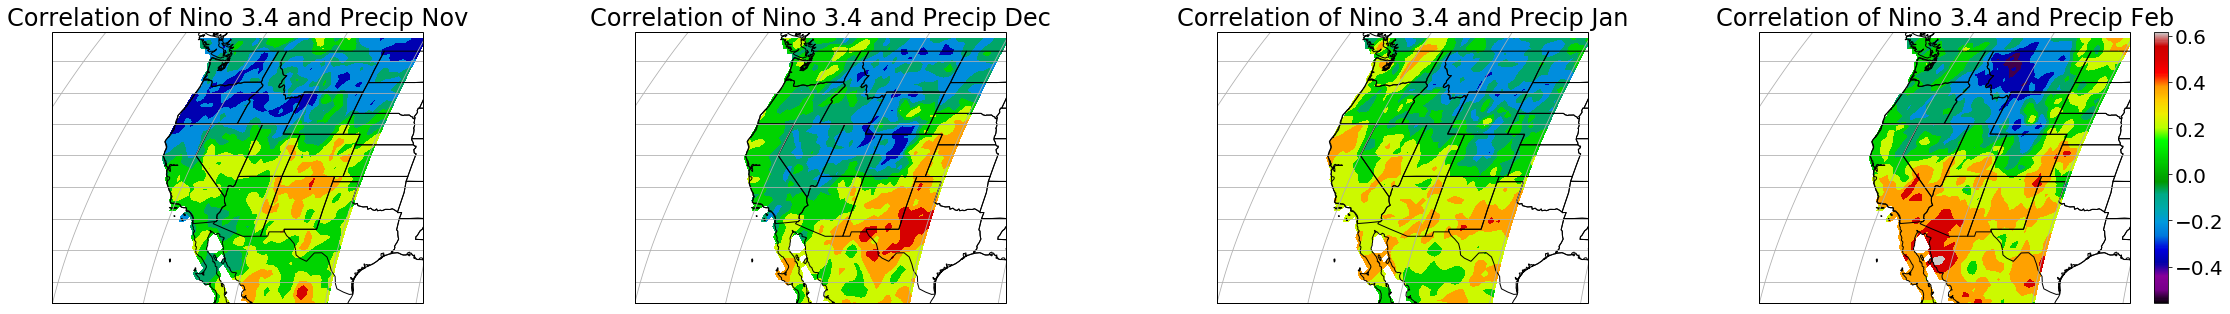

In [9]:
font = { 'family' : 'normal',
         'size'   : 20 }
plt.rc('font', **font)
minlist=[]
maxlist=[]
for i in [10,11,0,1]:
    minlist.append(np.nanmin(Cpn[i]))
    maxlist.append(np.nanmax(Cpn[i]))
month=["Nov","Dec","Jan","Feb"]
monthnum=[10,11,0,1]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(40,5))
minim_cpn=np.min(minlist)
maxim_cpn=np.max(maxlist)
for i,j in enumerate([ax1,ax2,ax3,ax4]):
    plotmap(Cpn[monthnum[i]],"Correlation of Nino 3.4 and Precip "+month[i],minim_cpn,maxim_cpn,"half",ax=j,colorbar="nonauto")
plt.imshow(Cpn[monthnum[i]],vmin=minim_cpn,vmax=maxim_cpn,cmap='nipy_spectral')
plt.colorbar()
plt.show()

These graphs show the correlation between Sea Surface Temperature in the tropics and Precipitation, the northern parts have more negative correlation while the south west has higher positive correlation values. Signifigance is |.3|. For the most part, the correlations in California are less signifigant in December and November, whereas January and moreso February show higher positive correlations. 

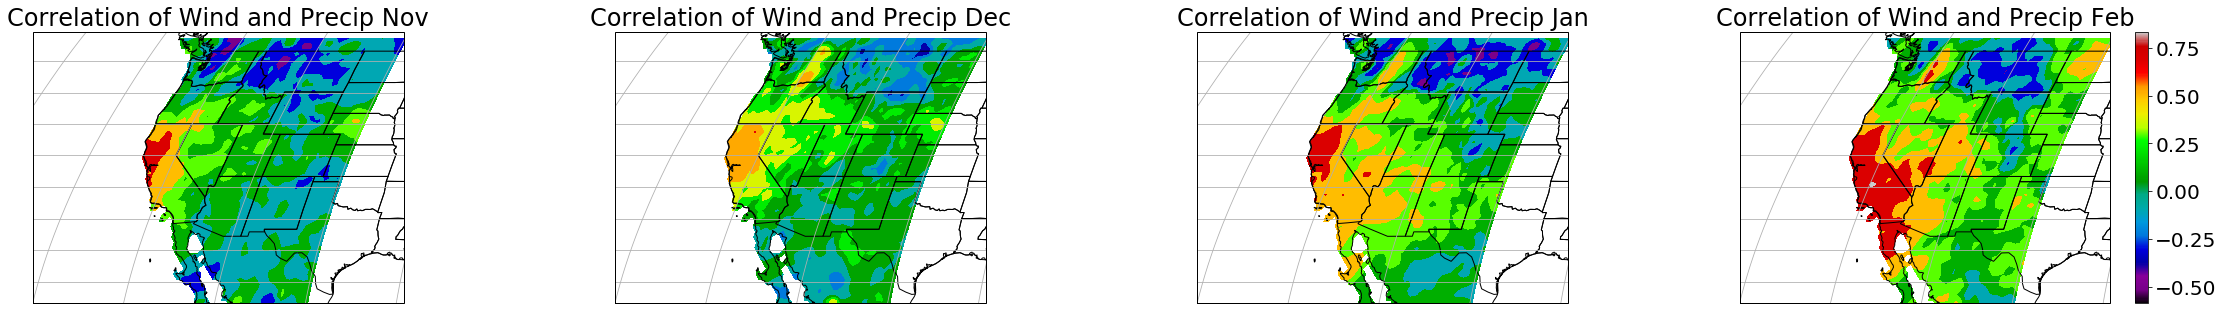

In [10]:
font = { 'family' : 'normal',
         'size'   : 20 }
plt.rc('font', **font)
minlist=[]
maxlist=[]
for i in [10,11,0,1]:
    minlist.append(np.min(Cpw[i]))
    maxlist.append(np.max(Cpw[i]))
month=["Nov","Dec","Jan","Feb"]
monthnum=[10,11,0,1]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(40,5))
minim_cpw=np.min(minlist)
maxim_cpw=np.max(maxlist)
for i,j in enumerate([ax1,ax2,ax3,ax4]):
    plotmap(Cpw[monthnum[i]],"Correlation of Wind and Precip "+month[i],minim_cpw,maxim_cpw,"half",ax=j,colorbar="nonauto")
plt.imshow(Cpw[monthnum[i]],vmin=minim_cpw,vmax=maxim_cpw,cmap='nipy_spectral')
plt.colorbar()
plt.show()

The wind and precipiation correlations show a clear pattern, with higher signfigiance levels centered on the central coast of California and decreasing as it goes further inland. 

Since Wind and SST are purely temporal data sets, we can examine how their correlations are related over time. Youcan see that the correlations do appear to be higher in the winter months (1,2,11,12) but also peak in april (4) 

Text(0.5, 1.0, 'Correlation between Wind and Nino 3.4')

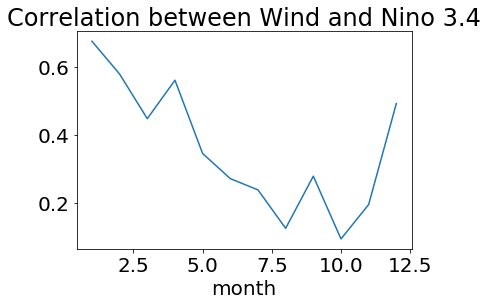

In [11]:
Cwn.plot()
plt.title("Correlation between Wind and Nino 3.4")

This plot shows that the correlation between wind and el nino is very high in January and steadily declines with some spikes until October. Correlation levels are greater than .3 from November till June. (Winter and Spring) 

**Regression**

We will now examine single variable and multi-variable regression coefficients and look at their signifigance

Regression will be determined using linear algebra:

$$A^TAx=A^Tb$$

$$x=(A^TA)^{-1}A^Tb$$

Where $A$ is our wind/sst values, $x$ are our linear regression coefficients and $b$ are our precipiation variables.

This can be done for both single variable and multi-variable.

In addition, the following equation is also used for single-variable regression and can be used as a check for our regression algorithm: 



$$\frac{cov(a,b)}{var(a)}$$ 

Where $a$ is the indepedent variable (sst or wind) and b is the dependent variable (precipitation). 


**Single variable**

In [12]:
vn=ninods.sst.groupby('T.month').var('T')
vw=windanom.ugrdprs.groupby('T.month').var('T')
Bpn=Spn/vn
Bpw=Spw/vw

In [13]:
def getmonth(data,month):
    return data.sel(T=data["T.month"]==month)


In [14]:
#def multiregression(month,shape=(52,62),raindata=precipds,winddata=wind,sstdata=ninods):

def singleregression(datadep,dataind,tshape=40,shape=(52,62)):
    cons=np.empty(shape)
    residual=np.empty(shape)
    if shape==(52,62):
        x,y=getlonlat("half")
    else:
         x,y=getlonlat("one")
    coef=np.empty(shape)
    a_array=np.ones((tshape,2))
    a_array[:,0]=dataind
    for i in range(shape[0]):
        for j in range(shape[1]):
            a_matrix=np.matmul(np.transpose(a_array),a_array)
            b_array=np.array(datadep.sel(Y=y[i],X=x[j]))
            B=np.matmul(np.transpose(a_array),b_array)
            X=np.linalg.solve(a_matrix,B) 
            yhat=np.matmul(a_array,X)
            residual[i,j]=np.nansum(np.square(b_array-yhat))
            coef[i,j]=X[0]
            cons[i,j]=X[1]
    return coef,cons,residual,np.linalg.inv(a_matrix)   


Check algorithm:

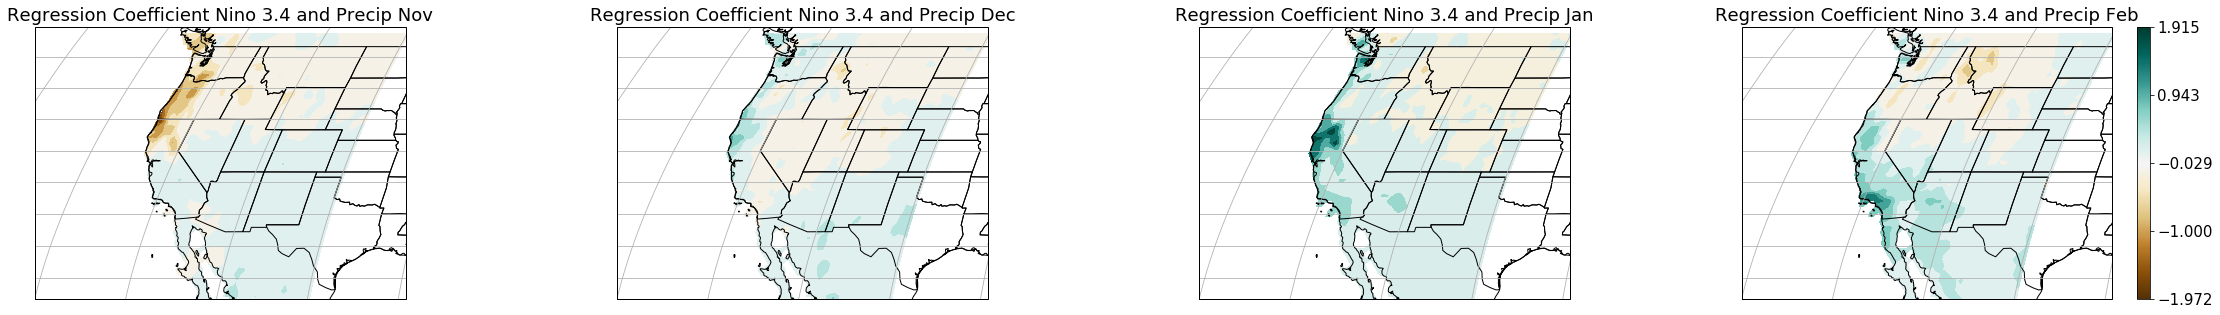

In [112]:
font = { 'family' : 'normal',
         'size'   : 15 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2]
fig, axes = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(40,5))
for i,j in enumerate(axes.flat):
    minim=np.min(Bpn)
    maxim=np.max(Bpn)
    plotmap(Bpn[monthnum[i]-1],"Regression Coefficient Nino 3.4 and Precip "+month[i],minim,maxim,"half",ax=j,colorbar="nonauto",cmap="BrBG")
plt.imshow(Bpn[i],vmin=minim,vmax=maxim,cmap='BrBG')
plt.colorbar(ticks=np.linspace(minim,maxim,5))
plt.show()

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype

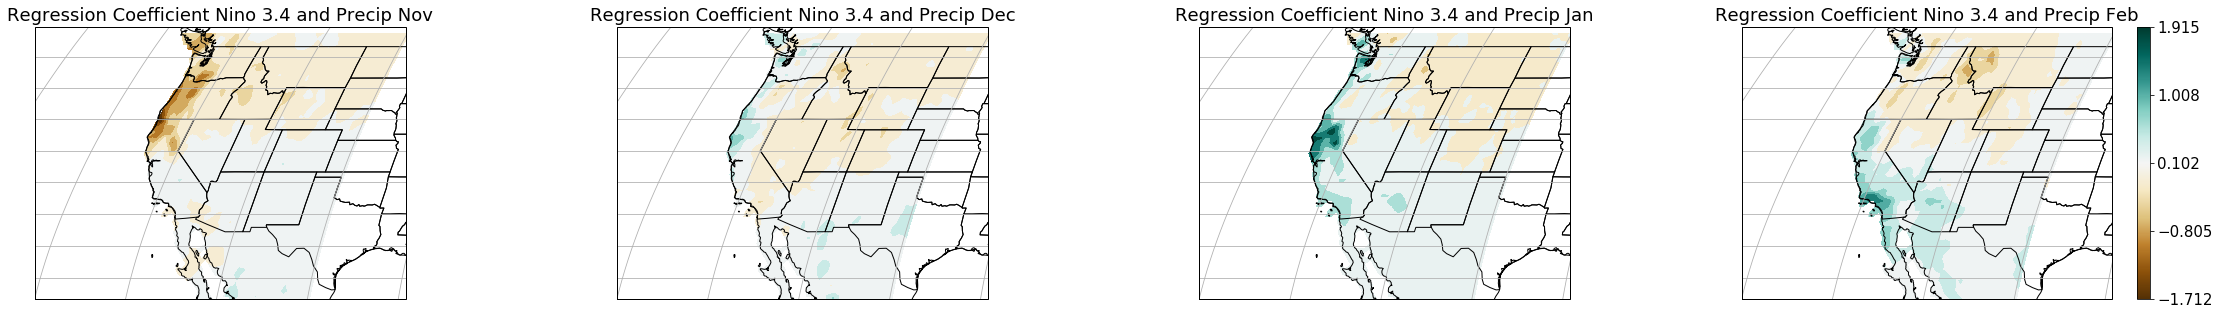

In [113]:
font = { 'family' : 'normal',
         'size'   : 15 }
plt.rc('font', **font)
minlist=[]
maxlist=[]
for i in [11,12,1,2]:
    sst=getmonth(ninods,i).sst
    rain=getmonth(precipds,i).rain-getmonth(precipds,i).rain.mean("T")
    windds=getmonth(wind,i).ugrdprs-getmonth(wind,i).ugrdprs.mean("T")
    minlist.append(np.nanmin(singleregression(rain,sst)[0]))
    maxlist.append(np.nanmax(singleregression(rain,sst)[0]))
month=["Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2]
fig, axes = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(40,5))
minim=min(minlist)
maxim=max(maxlist)
for i,j in enumerate(axes.flat):
    sst=getmonth(ninods,monthnum[i]).sst
    rain=getmonth(precipds,monthnum[i]).rain-getmonth(precipds,monthnum[i]).rain.mean("T")
    plotmap(singleregression(rain,sst)[0],"Regression Coefficient Nino 3.4 and Precip "+month[i],minim,maxim,"half",ax=j,colorbar="nonauto",cmap="BrBG")
plt.imshow(singleregression(rain,sst)[0],vmin=minim,vmax=maxim,cmap='BrBG')
plt.colorbar(ticks=np.linspace(minim,maxim,5))
plt.show()

The algorithm checks out. We can see that the Regression coefficients predicting Precipitation with El Nino are primarilypositive with the exception of November. The stronger regression values also lie along the coast of California. 

Wind and Precipitation:

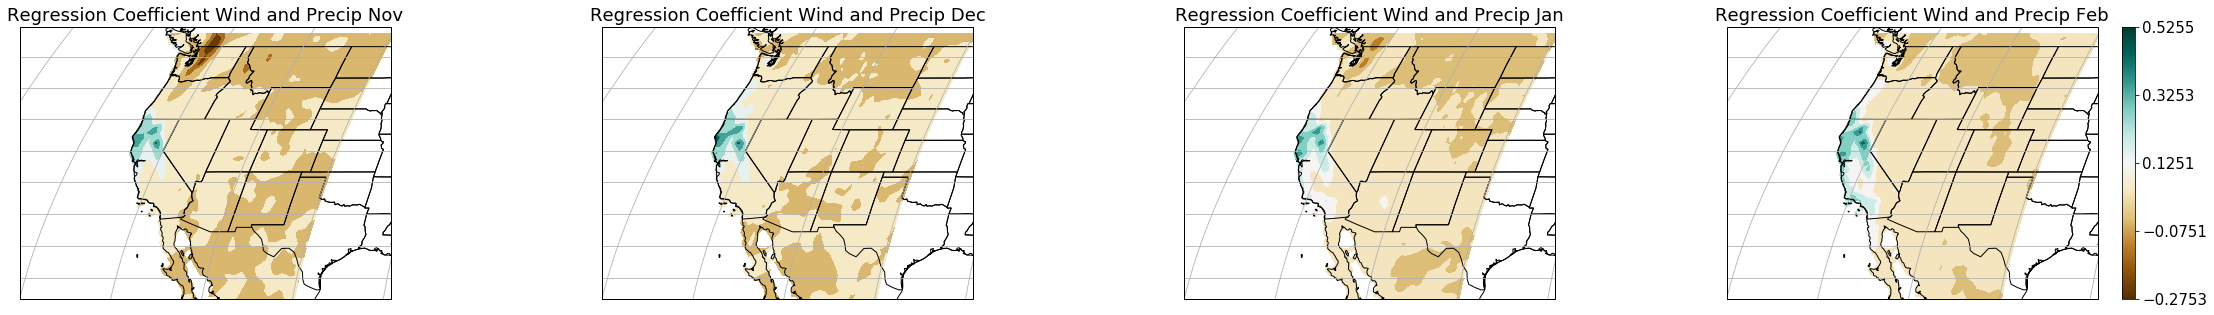

In [114]:
font = { 'family' : 'normal',
         'size'   : 15 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2]
fig, axes = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(40,5))
minim=np.min(Bpw)
maxim=np.max(Bpw)
for i,j in enumerate(axes.flat):
    plotmap(Bpw[monthnum[i]-1],"Regression Coefficient Wind and Precip "+month[i],minim,maxim,"half",ax=j,colorbar="nonauto",cmap="BrBG")
plt.imshow(Bpw[i],vmin=minim,vmax=maxim,cmap='BrBG')
plt.colorbar(ticks=np.linspace(minim,maxim,5))
plt.show()

Northern California gives primarily positive regression coefficients for Wind and Precipitation. However other regions give negative values (north west/south west). 

Multivariable Regression: 

In [18]:
def multiregression(datadep,dataind1,dataind2,tshape=40,shape=(52,62)):
    cons=np.empty(shape)
    residual=np.empty(shape)
    coef1=np.empty(shape)
    coef2=np.empty(shape)
    if shape==(52,62):
        x,y=getlonlat("half")
    else:
         x,y=getlonlat("one")
    coef=np.empty(shape)
    a_array=np.ones((tshape,3))
    a_array[:,0]=dataind1
    a_array[:,1]=dataind2
    for i in range(shape[0]):
        for j in range(shape[1]):
            a_matrix=np.matmul(np.transpose(a_array),a_array)
            b_array=np.array(datadep.sel(Y=y[i],X=x[j]))
            B=np.matmul(np.transpose(a_array),b_array)
            X=np.linalg.solve(a_matrix,B) 
            yhat=np.matmul(a_array,X)
            residual[i,j]=np.nansum(np.square(b_array-yhat))
            coef1[i,j]=X[0]
            coef2[i,j]=X[1]
            cons[i,j]=X[2]
    return coef1,coef2,cons,residual,np.linalg.inv(a_matrix)  

We can look at sifnifigance using an F-test:

$$F=\frac{\frac{RSS_1-RSS_2}{p_2-p_1}}{\frac{RSS_2}{n-p_2}}$$

$RSS_2$ being the squared residual error of the 2 variable regression, and $RSS_1$ being that of the single variable expression. $p_2-p_1=1$ because there is only one difference in variable dimensions. ($n=40,p_2=2$)

This is essentially showing the amount of error when one uses just one of the variables to regress as opposed to both. 

We look at the F distribution to determine signifigance of this test, which would be a value of about 4 at $\alpha=.05$

In [19]:
def ftest(datadepen,dataindepfactoredout,dataind,tshape=40):
    bivar=multiregression(datadepen,dataindepfactoredout,dataind,tshape)[3]
    var=singleregression(datadepen,dataindepfactoredout,tshape)[2]
    f=np.divide((var-bivar),bivar)*38
    return f

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  

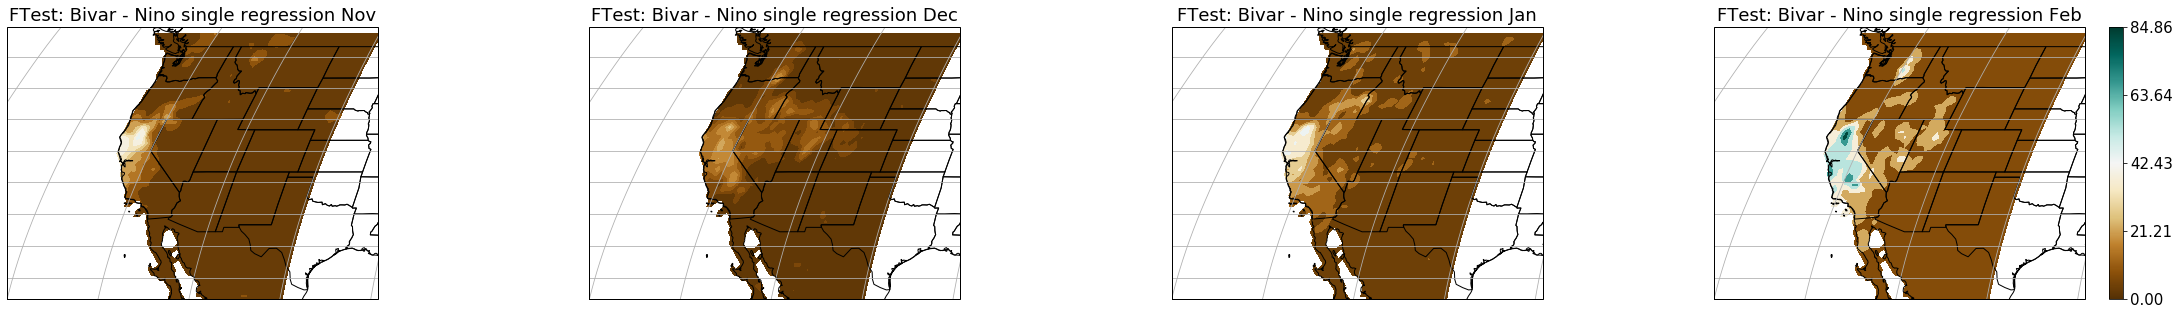

In [115]:
font = { 'family' : 'normal',
         'size'   : 15 }
plt.rc('font', **font)
minlist=[]
maxlist=[]
for i in [11,12,1,2]:
    sst=getmonth(ninods,i).sst
    rain=getmonth(precipds,i).rain-getmonth(precipds,i).rain.mean("T")
    windds=getmonth(wind,i).ugrdprs-getmonth(wind,i).ugrdprs.mean("T")
    minlist.append(np.nanmin(ftest(rain,sst,windds)))
    maxlist.append(np.nanmax(ftest(rain,sst,windds)))
month=["Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2]
fig, axes = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(40,5))
maxim=max(maxlist)
minim=min(minlist)
for i,j in enumerate(axes.flat):
    sst=getmonth(ninods,monthnum[i]).sst
    rain=getmonth(precipds,monthnum[i]).rain-getmonth(precipds,monthnum[i]).rain.mean("T")
    windds=getmonth(wind,monthnum[i]).ugrdprs-getmonth(wind,monthnum[i]).ugrdprs.mean("T")
    plotmap(ftest(rain,sst,windds),"FTest: Bivar - Nino single regression "+month[i],minim,maxim,"half",ax=j,colorbar="nonauto",cmap="BrBG")
plt.imshow(ftest(rain,sst,windds),vmin=minim,vmax=maxim,cmap='BrBG')
plt.colorbar(ticks=np.linspace(minim,maxim,5))
plt.show()



We are estimating the error when using a bivariate regression vs a single variable regression with just Nino 3.4. This should tell us the signfigance of using wind and Nino 3.4 to predict precipitation instead o just Nino 3.4. Recall that signifigance occurs for values >4. FOr each month, California show regions of signifigance,more notablyin February and January. 

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  

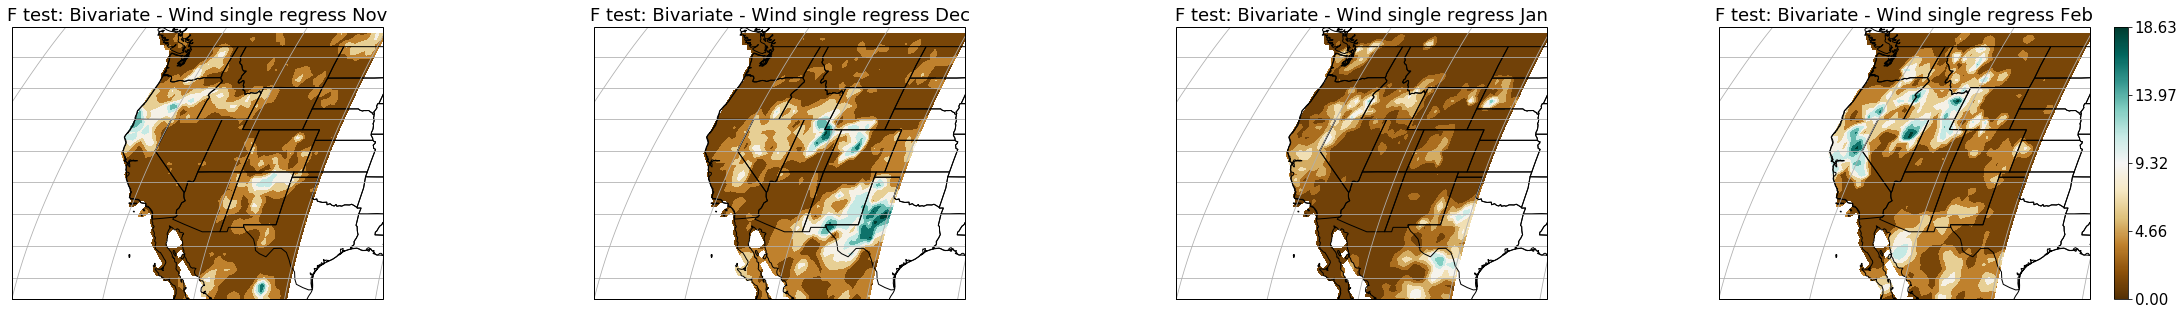

In [116]:
minlist=[]
maxlist=[]
for i in [11,12,1,2]:
    sst=getmonth(ninods,i).sst
    rain=getmonth(precipds,i).rain-getmonth(precipds,i).rain.mean("T")
    windds=getmonth(wind,i).ugrdprs-getmonth(wind,i).ugrdprs.mean("T")
    minlist.append(np.nanmin(ftest(rain,windds,sst)))
    maxlist.append(np.nanmax(ftest(rain,windds,sst)))
month=["Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2]
fig, axes = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(40,5))
maxim=max(maxlist)
minim=min(minlist)
for i,j in enumerate(axes.flat):
    sst=getmonth(ninods,monthnum[i]).sst
    rain=getmonth(precipds,monthnum[i]).rain-getmonth(precipds,monthnum[i]).rain.mean("T")
    windds=getmonth(wind,monthnum[i]).ugrdprs-getmonth(wind,monthnum[i]).ugrdprs.mean("T")
    plotmap(ftest(rain,windds,sst),"F test: Bivariate - Wind single regress "+month[i],minim,maxim,"half",ax=j,colorbar="nonauto",cmap="BrBG")
plt.imshow(ftest(rain,windds,sst),vmin=minim,vmax=maxim,cmap='BrBG')
plt.colorbar(ticks=np.linspace(minim,maxim,5))
plt.show()

Note the change in color scale between this and the other F test plot, which ranges from 0-80. There are some regions in California that show the relative signifigance of leaving Nino 3.4 out of the regression, the values are lower than that of wind. 

Partial Correlation: 

Partial correlation regresses out one of the variables in a bivariate regression so that one can see how two variables are correlated with the association from the third variable removed.

The equation is as follows: 

$$
\rho_{xy|z }=\frac{N\sum_{n=1}^{N}{e_{x,i}e_{y,i}}}
{\sqrt{N\sum_{n=1}^{N}{e_{x,i}^2}}\sqrt{N\sum_{n=1}^{N}{e_{y,i}^2}}}
$$

Where z is the independent variable in regression and x/y are two dependent variables. 

For our purposes, z will either be sst or wind, while x and y will be precipitation and either sst or wind. This will allow us to see for example the correlation between sst and precipitation with the effects of wind taken away. 

In [22]:
def regress(a,b):
    A=np.matmul(np.transpose(a),a)
    B=np.matmul(np.transpose(a),b)
    return np.linalg.solve(A,B)

def partialcorr(dependent,independent,precip,month,shape,tshape):
    error1=np.empty((shape[0],shape[1],tshape))
    b2=dependent
    a=np.ones((tshape,2))
    a[:,0]=np.array(independent)
    if shape==(52,62):
        lats = np.linspace(24.75,50.25, 52)
        lons= np.linspace(-130.25,-99.75,62)
        (x,y)=(lons,lats)
    else:
         x,y=getlonlat("one")
    for i in range(shape[1]):
        for j in range(shape[0]):
            b_array1=np.array(precip.sel(Y=y[j],X=x[i]))
            x1=regress(a,b_array1)
            error1[j,i,:]=np.square(b_array1-np.matmul(a,x1))
    b_array2=np.ones((tshape))
    for k,m in enumerate([1.0,2.0,3.0,4.0]):
        b_array2=b2
    x2=regress(a,b_array2)
    error2=np.square(b_array2-np.matmul(a,x2))
    pc=np.empty(shape)
    for i in range(shape[1]):
        for j in range(shape[0]):
            pc[j,i]=np.corrcoef(error1[j,i,:],error2)[0,1]
    return pc
        
        


/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype

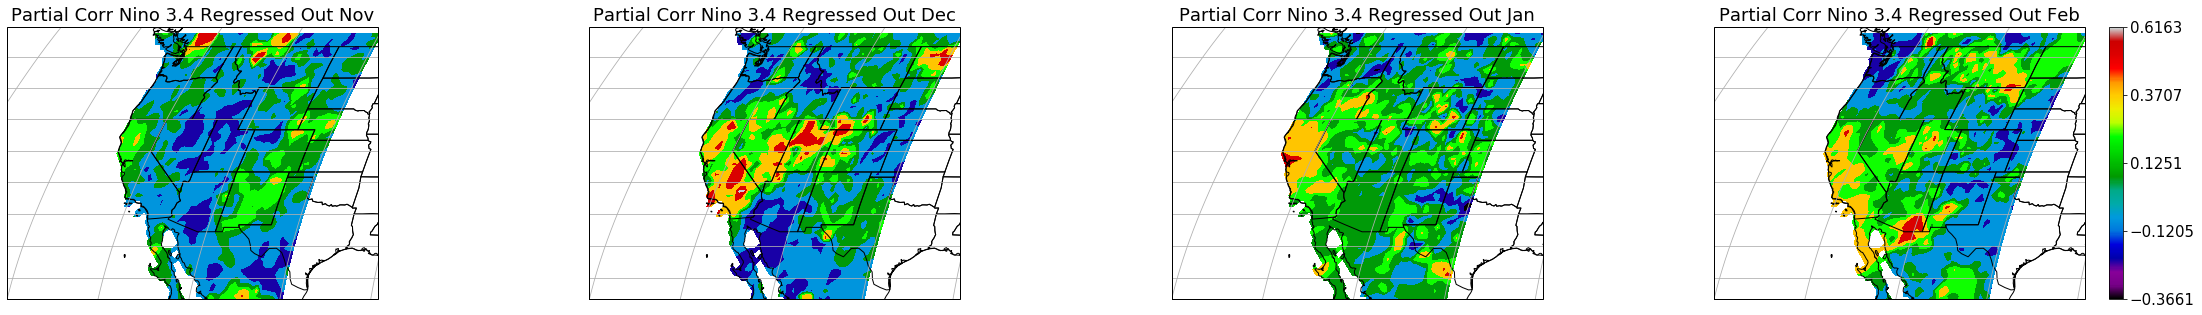

In [23]:
minlist=[]
maxlist=[]
for i in [11,12,1,2]:
    sst=getmonth(ninods,i).sst
    rain=getmonth(precipds,i).rain-getmonth(precipds,i).rain.mean("T")
    windds=getmonth(wind,i).ugrdprs-getmonth(wind,i).ugrdprs.mean("T")
    minlist.append(np.nanmin(partialcorr(windds,sst,rain,"half",(52,62),40)))
    maxlist.append(np.nanmax(partialcorr(windds,sst,rain,"half",(52,62),40)))
month=["Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2]
fig, axes = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(40,5))
minim_sind=min(minlist)
maxim_sind=max(maxlist)
for i,j in enumerate(axes.flat):
    sst=getmonth(ninods,monthnum[i]).sst
    rain=getmonth(precipds,monthnum[i]).rain-getmonth(precipds,monthnum[i]).rain.mean("T")
    windds=getmonth(wind,monthnum[i]).ugrdprs-getmonth(wind,monthnum[i]).ugrdprs.mean("T")
    plotmap(partialcorr(windds,sst,rain,"half",(52,62),40),"Partial Corr Nino 3.4 Regressed Out "+month[i],minim_sind,maxim_sind,"half",ax=j,colorbar="nonauto")
plt.imshow(partialcorr(windds,sst,rain,"half",(52,62),40),vmin=minim_sind,vmax=maxim_sind,cmap='nipy_spectral')
plt.colorbar(ticks=np.linspace(minim_sind,maxim_sind,5))
plt.show()

This compares the correlation of wind and precipitation removing any affiliation with Nino 3.4. Partial Correlation values are >.3 for many spots in California, particularly in February, December and January. 

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype

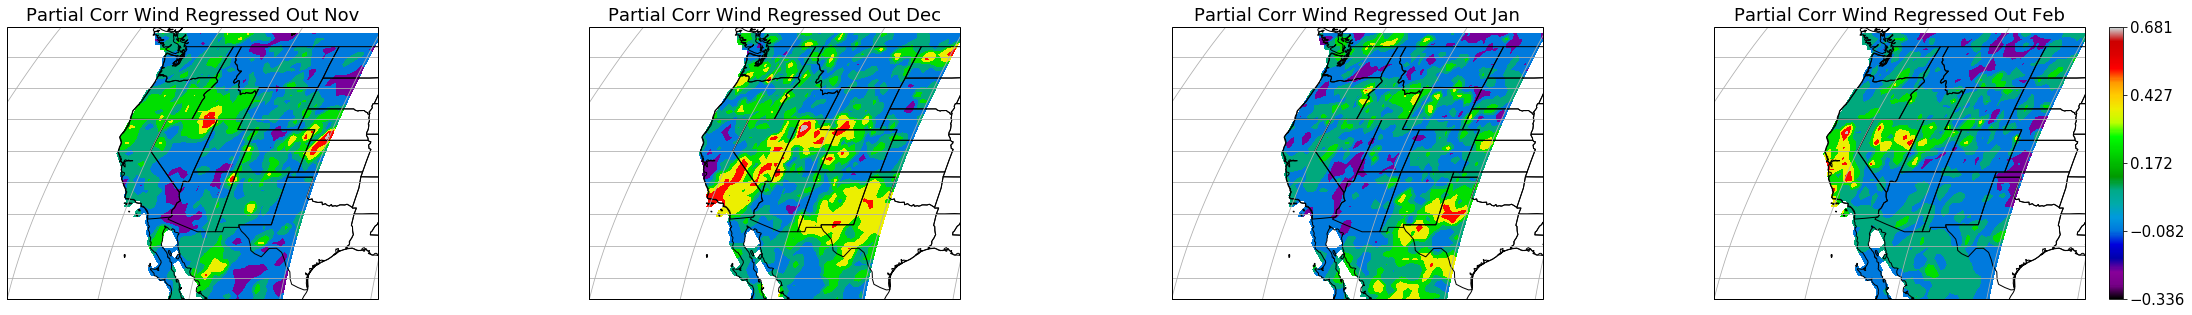

In [24]:
minlist=[]
maxlist=[]
for i in [11,12,1,2]:
    sst=getmonth(ninods,i).sst
    rain=getmonth(precipds,i).rain-getmonth(precipds,i).rain.mean("T")
    windds=getmonth(wind,i).ugrdprs-getmonth(wind,i).ugrdprs.mean("T")
    minlist.append(np.nanmin(partialcorr(sst,windds,rain,"half",(52,62),40)))
    maxlist.append(np.nanmax(partialcorr(sst,windds,rain,"half",(52,62),40)))
month=["Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2]
fig, axes = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(40,5))
minim_pcwi=min(minlist)
maxim_pcwi=max(maxlist)
for i,j in enumerate(axes.flat):
    sst=getmonth(ninods,monthnum[i]).sst
    rain=getmonth(precipds,monthnum[i]).rain-getmonth(precipds,monthnum[i]).rain.mean("T")
    windds=getmonth(wind,monthnum[i]).ugrdprs-getmonth(wind,monthnum[i]).ugrdprs.mean("T")
    plotmap(partialcorr(sst,windds,rain,"half",(52,62),40),"Partial Corr Wind Regressed Out "+month[i],minim_pcwi,maxim_pcwi,"half",ax=j,colorbar="nonauto")
plt.imshow(partialcorr(sst,windds,rain,"half",(52,62),40),vmin=minim_pcwi,vmax=maxim_pcwi,cmap='nipy_spectral')
plt.colorbar(ticks=np.linspace(minim_pcwi,maxim_pcwi,5))
plt.show()


The Partial Correlation with Wind Regressed out shows smaller regions of signifigance. Signifigance can be seen in December and February in California however it is less seen in January and November. 

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype

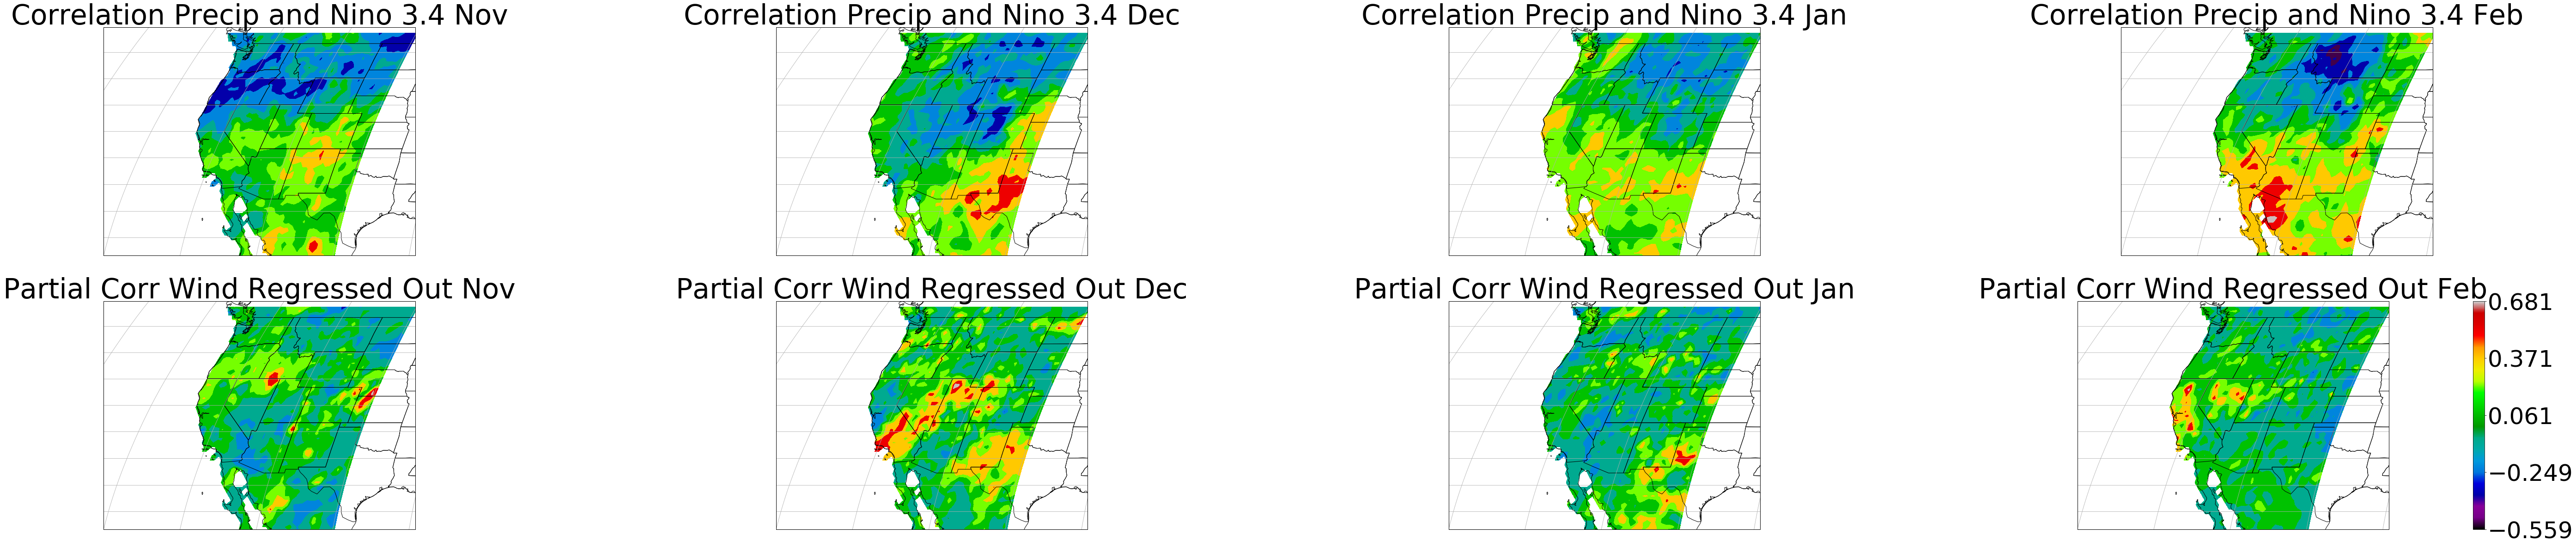

In [25]:

font = { 'family' : 'normal',
         'size'   : 50 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb","Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2,11,12,1,2]
fig, ax = plt.subplots(ncols=4,nrows=2,subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(100,20))
ax=np.reshape(ax,(8))
[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]=ax
minim_dual1=min(minim_cpn,minim_pcwi)
maxim_dual1=max(maxim_cpn,maxim_pcwi)
title_data=["Correlation Precip and Nino 3.4 ","Partial Corr Wind Regressed Out "]
#for row in [0,1]:
for i,j in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]):
    sst=getmonth(ninods,monthnum[i]).sst
    rain=getmonth(precipds,monthnum[i]).rain-getmonth(precipds,monthnum[i]).rain.mean("T")
    windds=getmonth(wind,monthnum[i]).ugrdprs-getmonth(wind,monthnum[i]).ugrdprs.mean("T")
    datas=[Cpn[monthnum[i]-1],partialcorr(sst,windds,rain,"half",(52,62),40)]
    if i<4:
        data=datas[0]
        plotmap(data,title_data[0]+month[i],minim_dual1,maxim_dual1,resolution="half",ax=j,colorbar="nonauto")
    else:
        data=datas[1]
        plotmap(data,title_data[1]+month[i],minim_dual1,maxim_dual1,resolution="half",ax=j,colorbar="nonauto")  
plt.imshow(data,vmin=minim_dual1,vmax=maxim_dual1,cmap='nipy_spectral')
plt.colorbar(pad=.15,ticks=np.linspace(minim_dual1,maxim_dual1,5))
plt.show()

Comparing correlation and partial correlation you can see that the maps follow similar trends, however the partial correlation maps show lower amounts of signifigance, with the exception of December where thereare high partial correlation values in areas were Correlation was initially low. 

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype

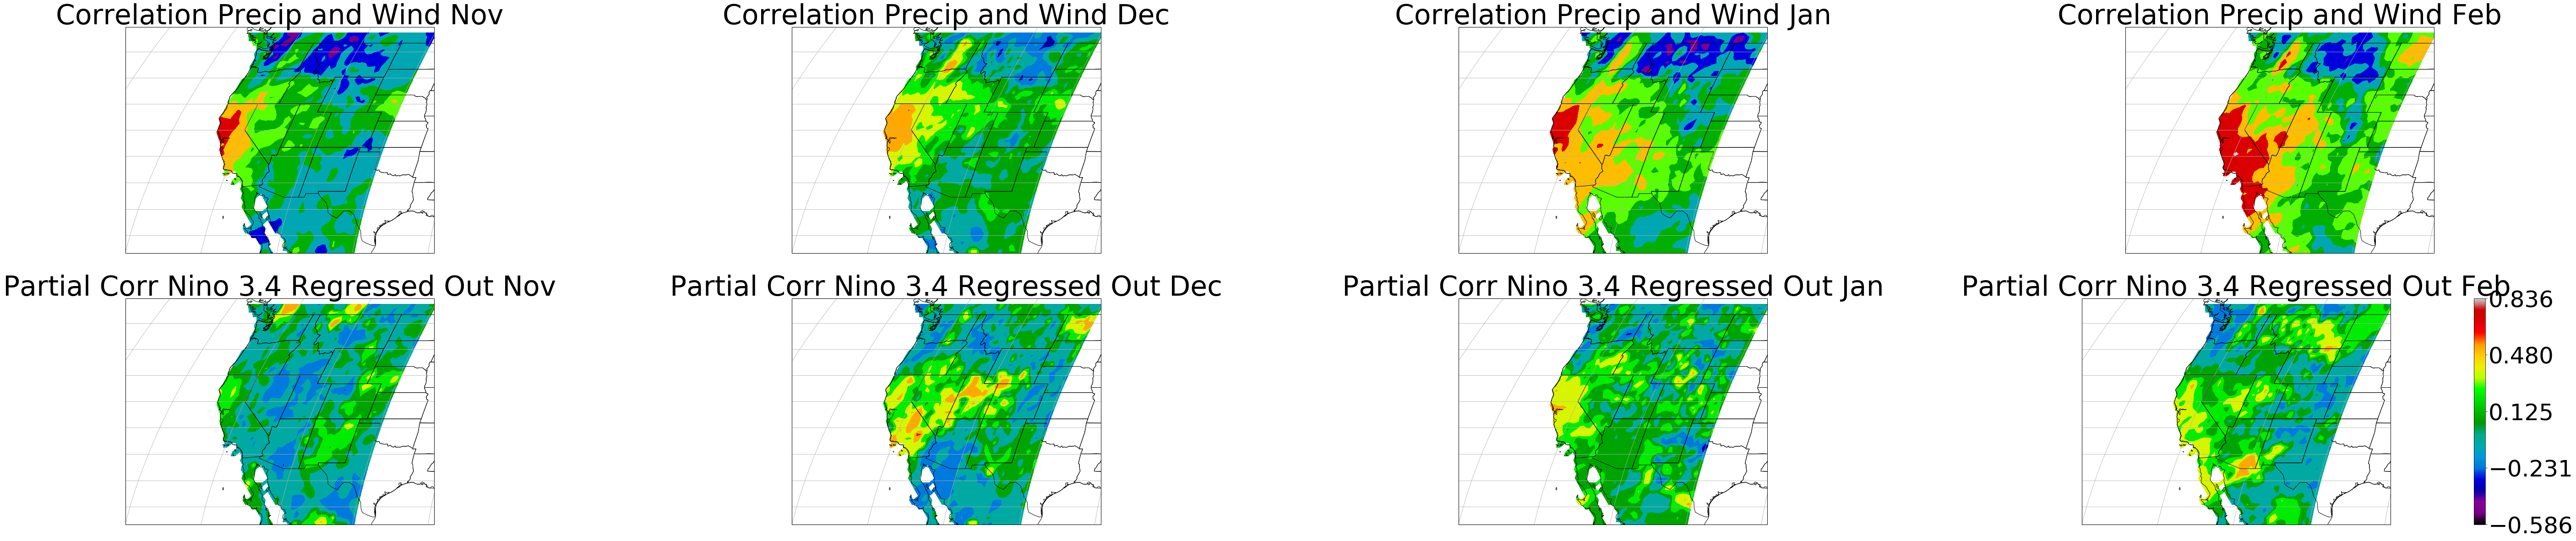

In [26]:
font = { 'family' : 'normal',
         'size'   : 50 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb","Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2,11,12,1,2]
fig, ax = plt.subplots(ncols=4,nrows=2,subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(100,20))
ax=np.reshape(ax,(8))
[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]=ax
minim_dual2=min(minim_cpw,minim_sind)
maxim_dual2=max(maxim_cpw,maxim_sind)
title_data=["Correlation Precip and Wind ","Partial Corr Nino 3.4 Regressed Out "]
#for row in [0,1]:
for i,j in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]):
    sst=getmonth(ninods,monthnum[i]).sst
    rain=getmonth(precipds,monthnum[i]).rain-getmonth(precipds,monthnum[i]).rain.mean("T")
    windds=getmonth(wind,monthnum[i]).ugrdprs-getmonth(wind,monthnum[i]).ugrdprs.mean("T")
    datas=[Cpw[monthnum[i]-1],partialcorr(windds,sst,rain,"half",(52,62),40)]
    if i<4:
        data=datas[0]
        plotmap(data,title_data[0]+month[i],minim_dual2,maxim_dual2,resolution="half",ax=j,colorbar="nonauto")
    else:
        data=datas[1]
        plotmap(data,title_data[1]+month[i],minim_dual2,maxim_dual2,resolution="half",ax=j,colorbar="nonauto")  
plt.imshow(data,vmin=minim_dual2,vmax=maxim_dual2,cmap='nipy_spectral')
plt.colorbar(pad=.15,ticks=np.linspace(minim_dual2,maxim_dual2,5))
plt.show()

The partial correlation maps follow the patterns of the correlation map but with smaller values. 

Time Dependence: 

Next we used a lattitude/longitude mask of California in order to temporally analyze trends in California, we also looked at the south west as well as the Pacific NW. With the following longitude and lattitude ranges.

PNW:124-116W 41-48


SW: 113W-103W 32-38

In [27]:
def percentilefun(data):
    data=np.array(data)
    final=np.empty(np.shape(data))
    for i,j in enumerate(data):
        final[i]=scipy.stats.percentileofscore(data, j, kind='rank')
    return final 

In [28]:
mask=xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.GLOBAL/.v1p0/.extREALTIME/.rain/T/monthlyAverage/T/(Jan%201979)/(Dec%202018)/RANGE/X/(130W)/(100W)/RANGE/Y/25/50/RANGE/SOURCES/.Features/.Political/.World/.firstOrder_ESRI/.the_geom/objectid/2297/VALUE/rasterize/dods')
mask=mask.drop("objectid")

In [29]:
maskedprecip=precipds.where(mask.the_geom!=0).rain.mean(dim=["X","Y"])
maskedprecip

<xarray.DataArray 'rain' (T: 480, objectid: 1)>
array([[3.867149],
       [4.177405],
       [2.412044],
       ...,
       [0.571107],
       [2.418836],
       [1.756088]], dtype=float32)
Coordinates:
  * T        (T) datetime64[ns] 1979-01-16T12:00:00 ... 2018-12-16T12:00:00
Dimensions without coordinates: objectid

Divide up the data by month and produce scatter plots showing precipiation as functions of wind and sst: 

In [30]:
novp=getmonth(maskedprecip,11) 
decp=getmonth(maskedprecip,12)
janp=getmonth(maskedprecip,1)
febp=getmonth(maskedprecip,2)
winterp=xr.concat([novp,decp,janp,febp],dim="T")
novw=getmonth(wind,11)
decw=getmonth(wind,12)
janw=getmonth(wind,1)
febw=getmonth(wind,2)
winterw=xr.concat([novw,decw,janw,febw],dim="T")
novsst=getmonth(ninods,11)
decsst=getmonth(ninods,12)
jansst=getmonth(ninods,1)
febsst=getmonth(ninods,2)
wintersst=xr.concat([novsst,decsst,jansst,febsst],dim="T")

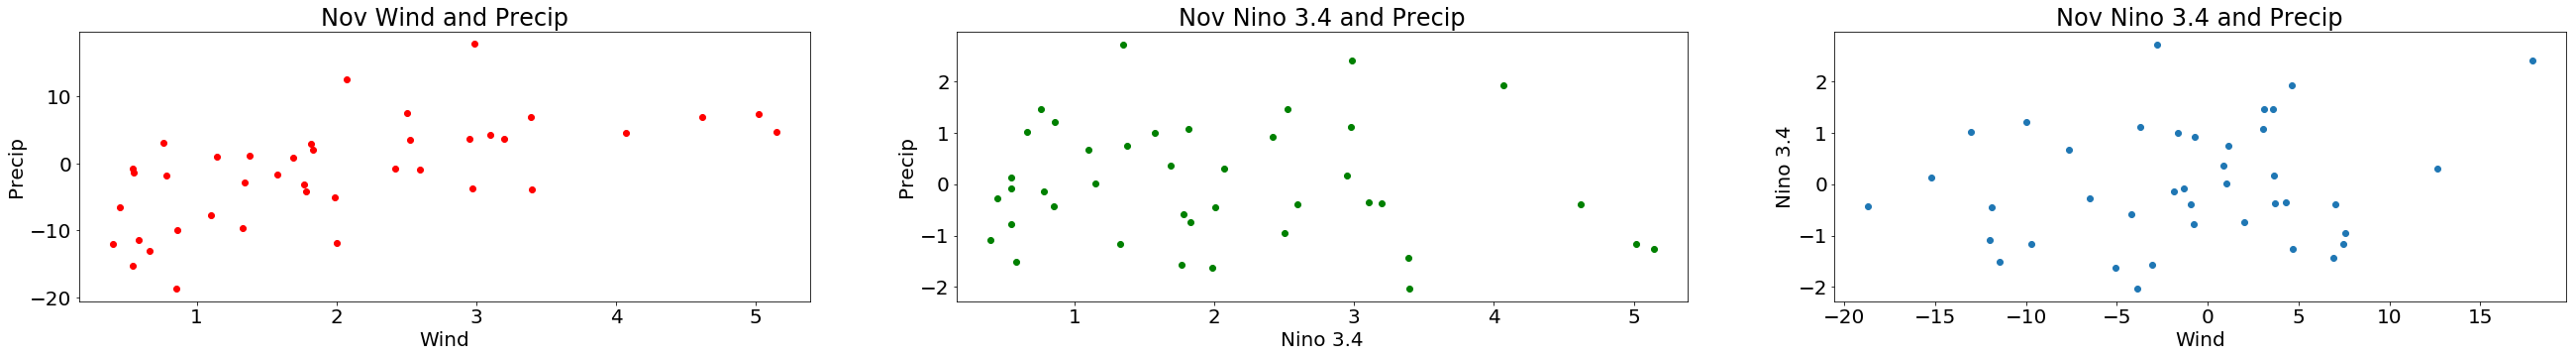

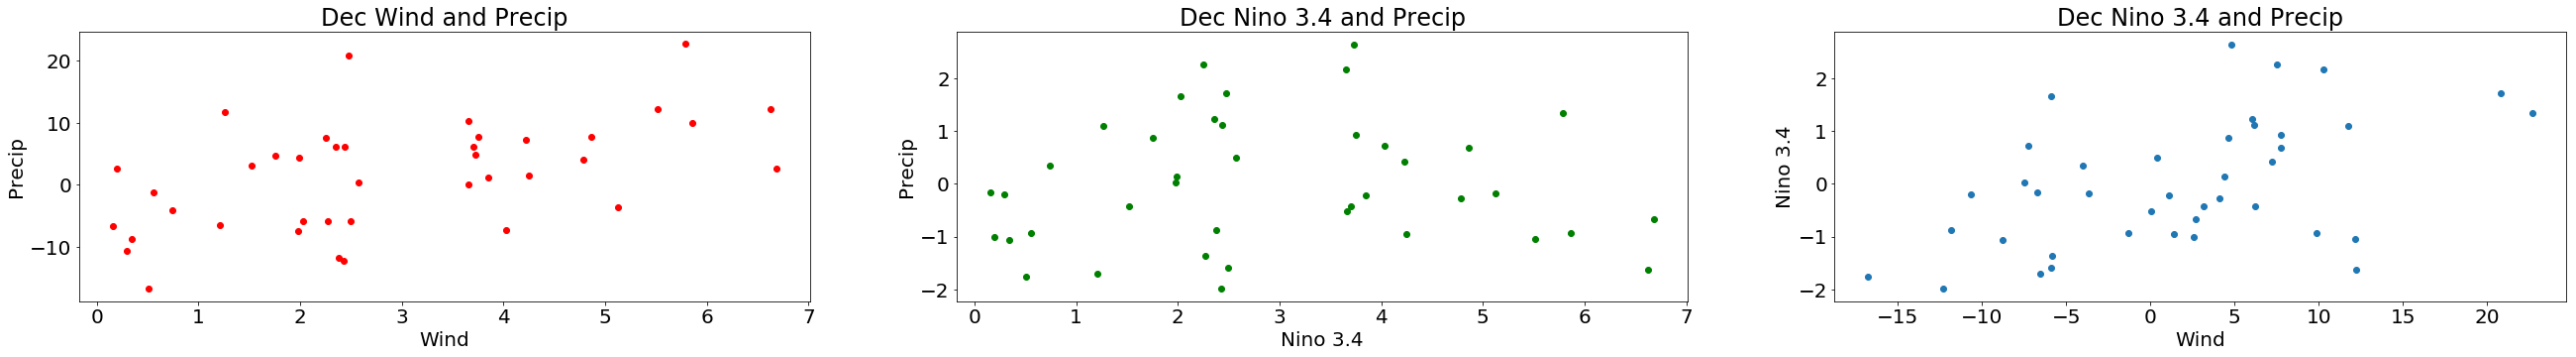

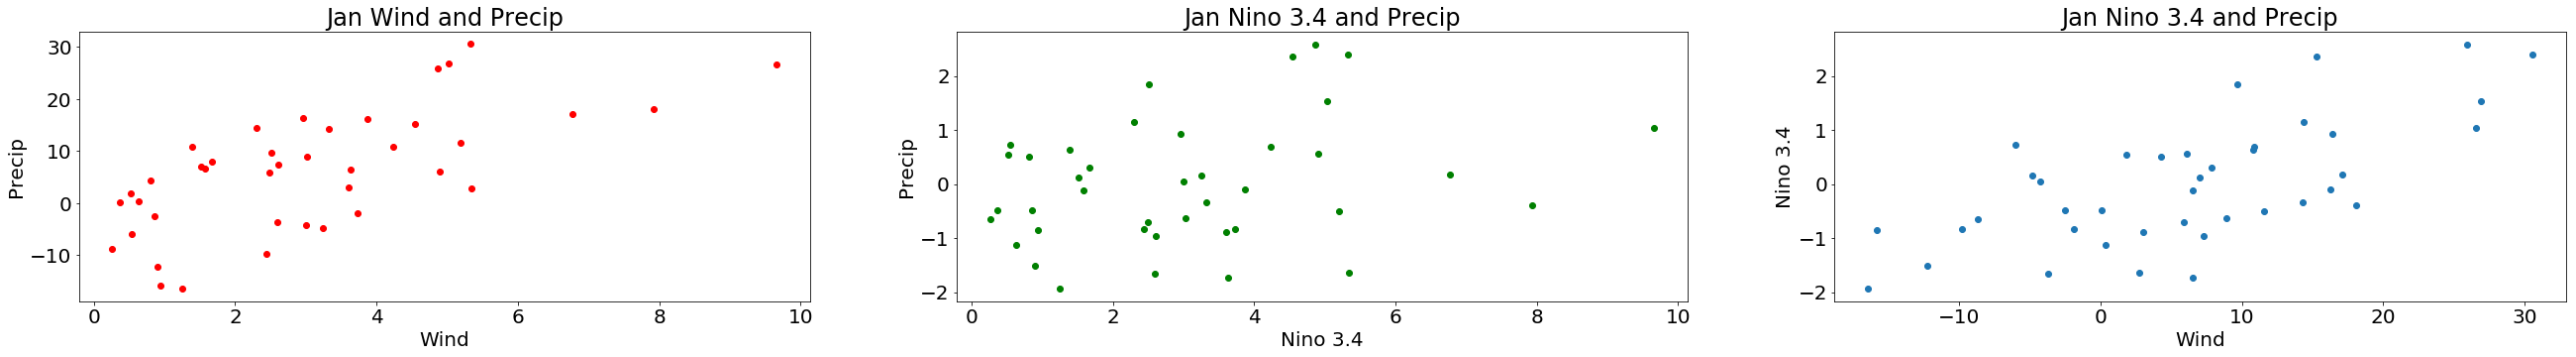

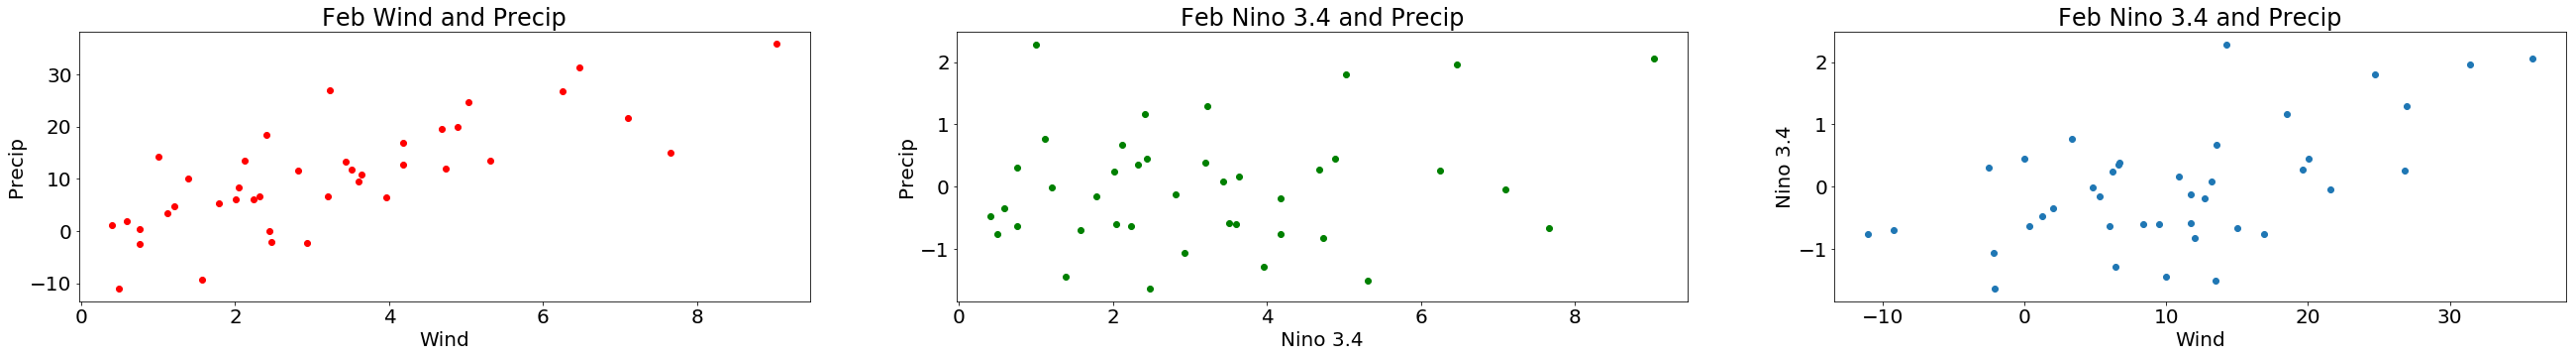

In [31]:
font = { 'family' : 'normal',
         'size'   : 20 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb"]
preciplist=[novp,decp,janp,febp]
windlist=[novw,decw,janw,febw]
sstlist=[novsst,decsst,jansst,febsst]
for i in range(4):
    fig, (ax1, ax2,ax3) = plt.subplots(ncols=3,figsize=(45,5))
    
    ax1.scatter(preciplist[i],windlist[i].ugrdprs,color="red")
    ax2.scatter(preciplist[i],sstlist[i].sst,color="green")
    ax3.scatter(windlist[i].ugrdprs,sstlist[i].sst)
    ax1.set_title(month[i]+' Wind and Precip')
    ax1.set_xlabel('Wind')
    ax1.set_ylabel('Precip')
    ax2.set_title(month[i]+' Nino 3.4 and Precip')
    ax2.set_xlabel('Nino 3.4')
    ax2.set_ylabel('Precip')
    ax3.set_title(month[i]+" Nino 3.4 and Precip")
    ax3.set_xlabel("Wind")
    ax3.set_ylabel("Nino 3.4")

Wind and Precipitation appear to have more positive linear associations. The Nino 3.4 and Precipiation plots show a slightly more uniform distribution. The Nino and Wind plots also show a fairly positive linear association. It is important to note that high Nino values are much less frequent,making it difficult to draw concrete conclusons with limited observational data. 

Bin the data into percentiles in order to produce boxplots (again with precip as the dependent variable)

In [32]:
def percentilebin(data,bins=5):
    bino=np.empty((np.shape(data)))
    percentile=np.empty((bins))
    for i,j in enumerate(np.linspace(0,1,bins)):
        percentile[i]=np.quantile(data,j)
        percentile=list(percentile)
    for j,i in enumerate(np.array(data)):
        index=percentile.index(min(percentile, key=lambda x:abs(x-i)))
        bino[j]=np.linspace(0,1,bins)[index]
    return bino

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


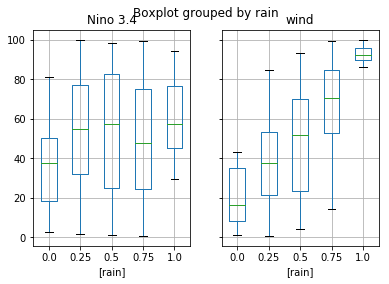

In [33]:
font = { 'family' : 'normal',
         'size'   : 10 }
plt.rc('font', **font)
import scipy.stats
raindf=pd.DataFrame({"rain":np.reshape(percentilebin(winterp),(160,)),"Nino 3.4":percentilefun(wintersst.sst),"wind":percentilefun(winterw.ugrdprs)})

rrst=pd.DataFrame({"rain":np.reshape(percentilefun(winterp),(160,)),"Nino 3.4":percentilebin(wintersst.sst)})
rw=pd.DataFrame({"rain":np.reshape(percentilefun(winterp),(160,)),"wind":percentilebin(winterw.ugrdprs)})
boxplot = raindf.boxplot(by='rain')

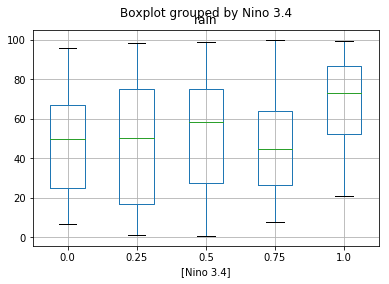

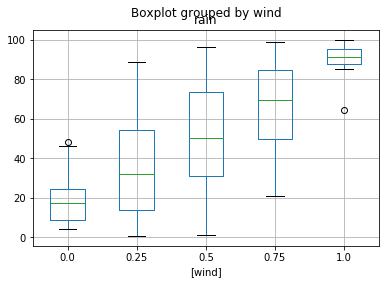

In [34]:
boxplot=rrst.boxplot(by='Nino 3.4')
boxplot=rw.boxplot(by='wind')

The boxplots show a far more linear relationship with wind and precipiation while the Nino 3.4 precipitation plots are less dramatic in association. 

Heat map (all 3 variables represented as percentiles)

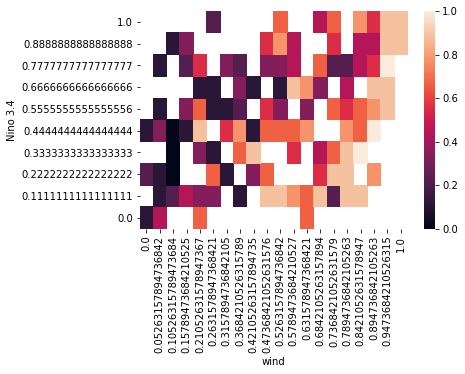

In [35]:
dsbin=pd.DataFrame({"rain":np.reshape(percentilebin(winterp,10),(160,)),"Nino 3.4":percentilebin(wintersst.sst,10),"wind":percentilebin(winterw.ugrdprs,20)})
import seaborn as sns
import pandas as pd

dsbin.drop_duplicates(['Nino 3.4','wind'], inplace=True)
pivot = dsbin.pivot(index='Nino 3.4', columns='wind', values='rain')
ax = sns.heatmap(pivot)
ax.invert_yaxis()
plt.show()

Higher precipiation values cluster on the right side of the heat map (where winds are higher). There does seem to be a subtle upward trend with Nino 3.4 but not as dramatic as with wind. 

Examining the PNW and SW: 

In [36]:
from pathlib import Path

my_file = Path("precip_nw_observational.nc")
if not my_file.is_file():
    !curl "http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.GLOBAL/.v1p0/.extREALTIME/.rain/T/monthlyAverage/T/%28Jan%201979%29/%28Dec%202018%29/RANGE/X/%281240W%29/%28116W%29/RANGE/Y/41/48/RANGE/T/(days%20since%201960-01-01)streamgridunitconvert/data.nc" -o "precip_nw_observational.nc"
    
my_file = Path("precip_sw_observational.nc")
if not my_file.is_file():
    !curl "http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.GLOBAL/.v1p0/.extREALTIME/.rain/T/monthlyAverage/T/%28Jan%201979%29/%28Dec%202018%29/RANGE/X/%28113W%29/%28103W%29/RANGE/Y/32/38/RANGE/T/(days%20since%201960-01-01)streamgridunitconvert/data.nc" -o "precip_sw_observational.nc"

In [37]:
precipurlnw="http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.GLOBAL/.v1p0/.extREALTIME/.rain/T/monthlyAverage/T/%28Jan%201979%29/%28Dec%202018%29/RANGE/X/%281240W%29/%28116W%29/RANGE/Y/41/48/RANGE/T/(days%20since%201960-01-01)streamgridunitconvert/dods"
precipurlsw="http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.GLOBAL/.v1p0/.extREALTIME/.rain/T/monthlyAverage/T/%28Jan%201979%29/%28Dec%202018%29/RANGE/X/%28113W%29/%28103W%29/RANGE/Y/32/38/RANGE/T/(days%20since%201960-01-01)streamgridunitconvert/dods"
pacificnw=xr.open_dataset("precip_nw_observational.nc")
southwest= xr.open_dataset("precip_sw_observational.nc")
pacificnw=pacificnw.rain.mean(dim=["X","Y"])
southwest=southwest.rain.mean(dim=["X","Y"])

In [38]:
novpsw=getmonth(southwest,11) 
decpsw=getmonth(southwest,12)
janpsw=getmonth(southwest,1)
febpsw=getmonth(southwest,2)
novpnw=getmonth(pacificnw,11) 
decpnw=getmonth(pacificnw,12)
janpnw=getmonth(pacificnw,1)
febpnw=getmonth(pacificnw,2)
winterpsw=xr.concat([novpsw,decpsw,janpsw,febpsw],dim="T")
winterpnw=xr.concat([novpnw,decpnw,janpnw,febpnw],dim="T")

SW scatter plots: 

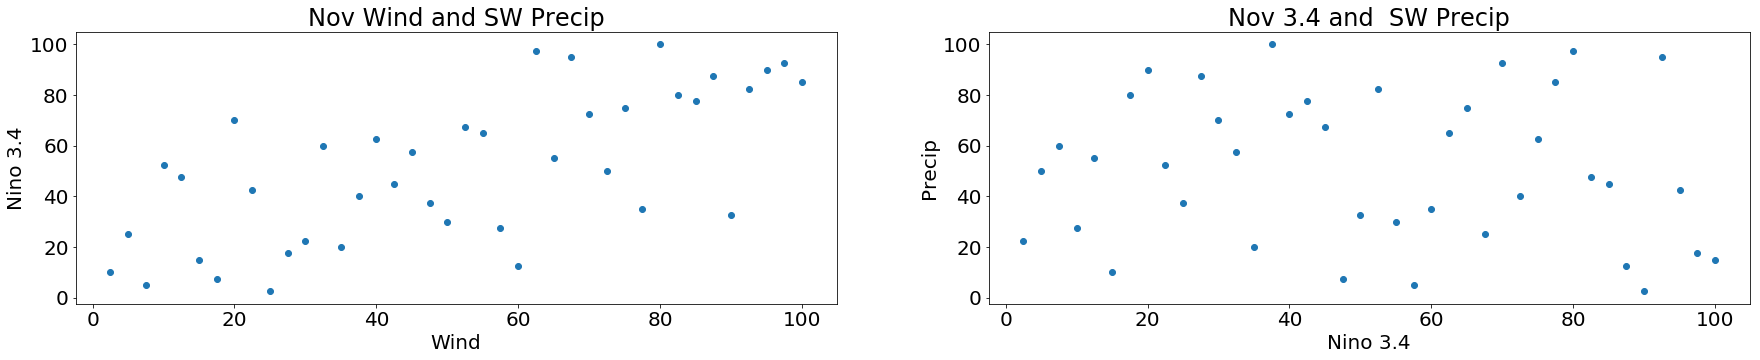

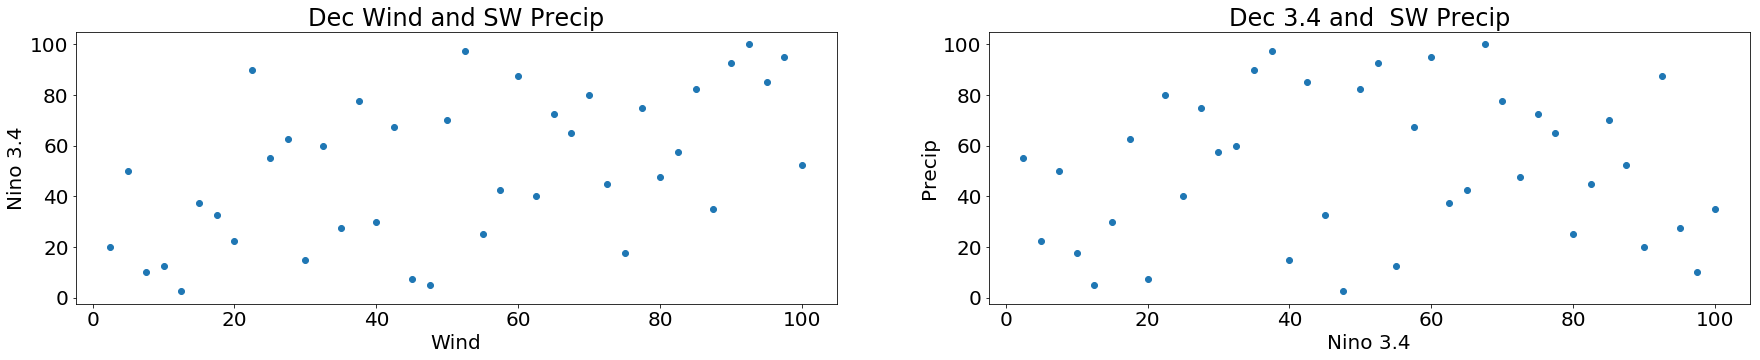

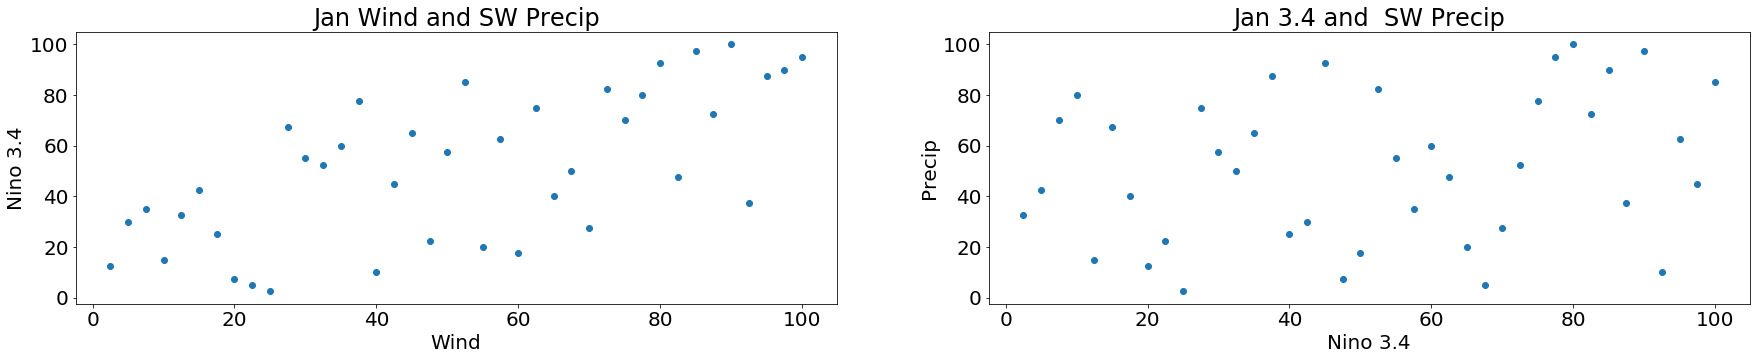

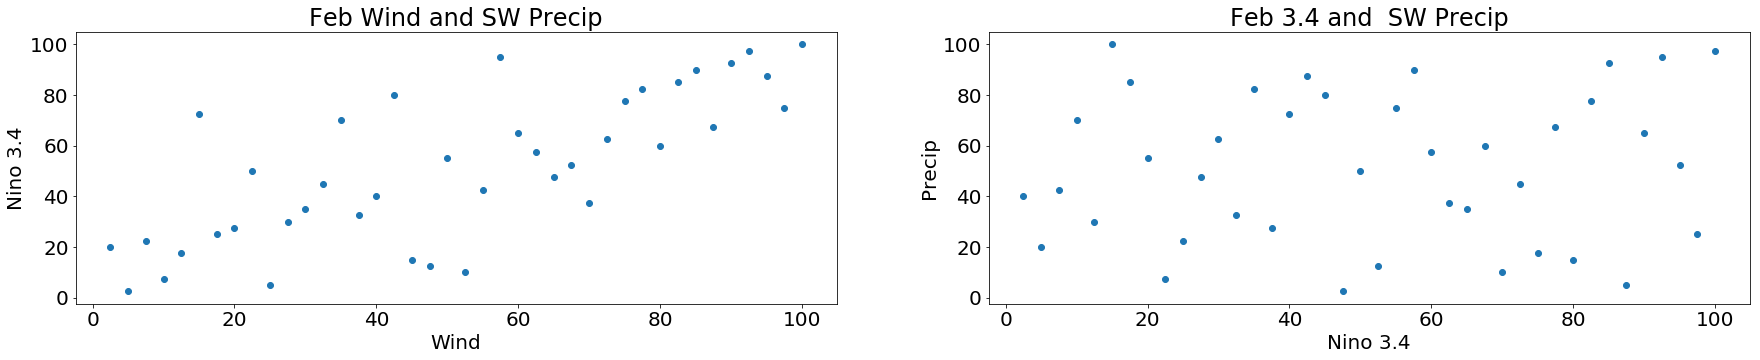

In [39]:
font = { 'family' : 'normal',
         'size'   : 20 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb"]
preciplistsw=[novpsw,decpsw,janpsw,febpsw]
windlist=[novw,decw,janw,febw]
sstlist=[novsst,decsst,jansst,febsst]
for i in range(4):
    fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(30,5))
    ax1.scatter(percentilefun(preciplist[i]),percentilefun(windlist[i].ugrdprs))
    ax2.scatter(percentilefun(preciplist[i]),percentilefun(sstlist[i].sst))
    ax1.set_title(month[i]+' Wind and SW Precip')
    ax1.set_xlabel('Wind')
    ax1.set_ylabel('Nino 3.4')
    ax2.set_title(month[i]+' Nino 3.4 and  SW Precip')
    ax2.set_xlabel('Nino 3.4')
    ax2.set_ylabel('Precip')

The SW plots have similarities to the California plots. Wind and Precipiation have more linear associations than Nino 3.4 and Precipitation plots which appear more uniform. 

NW scatter plots

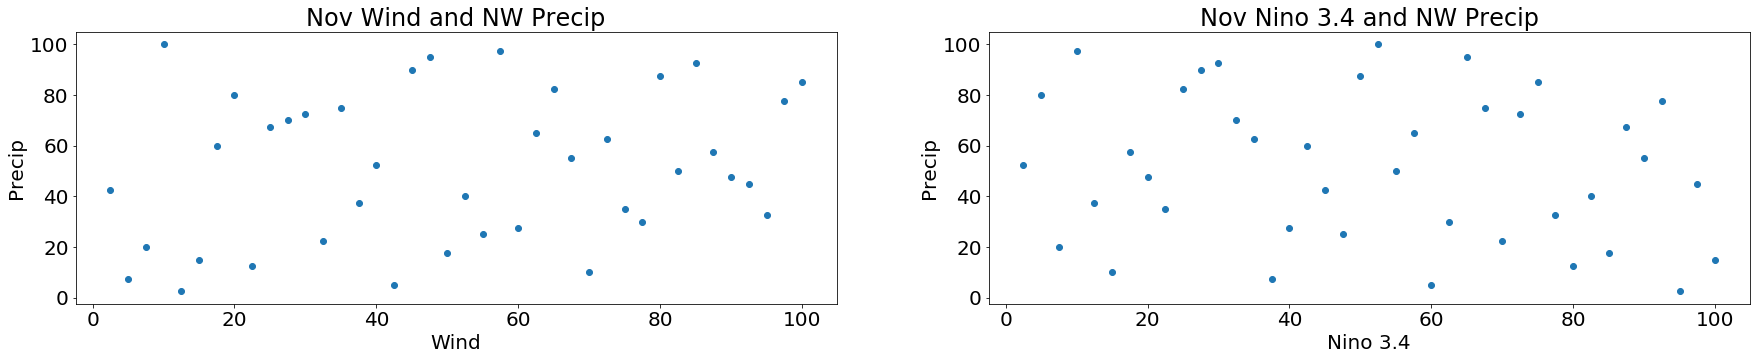

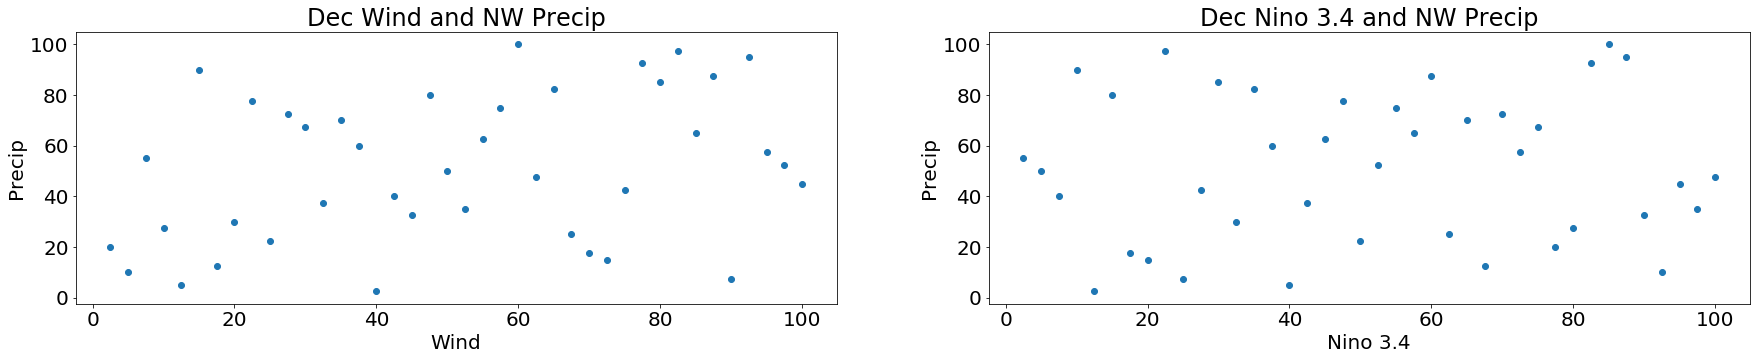

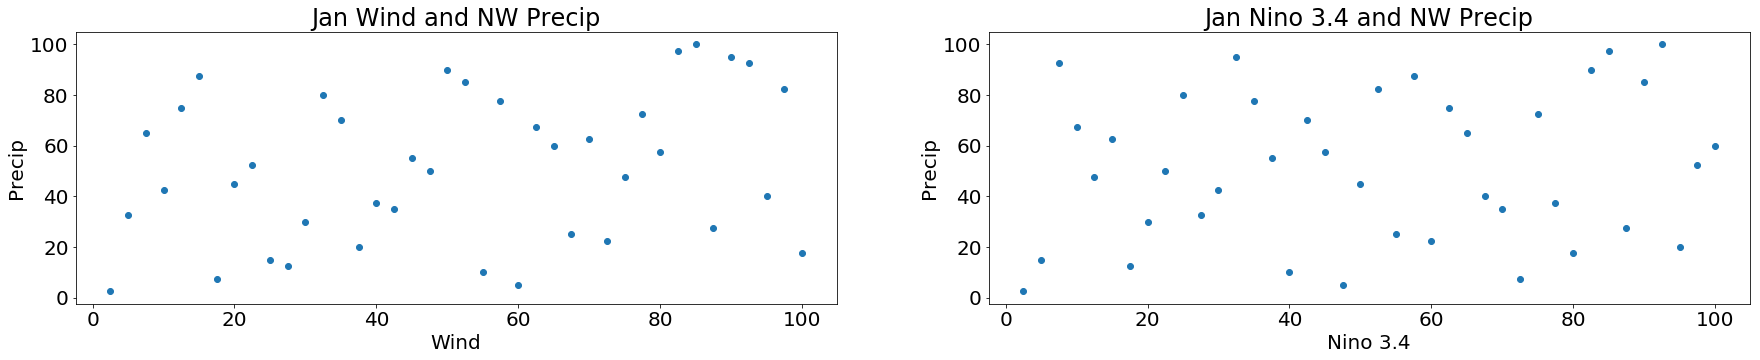

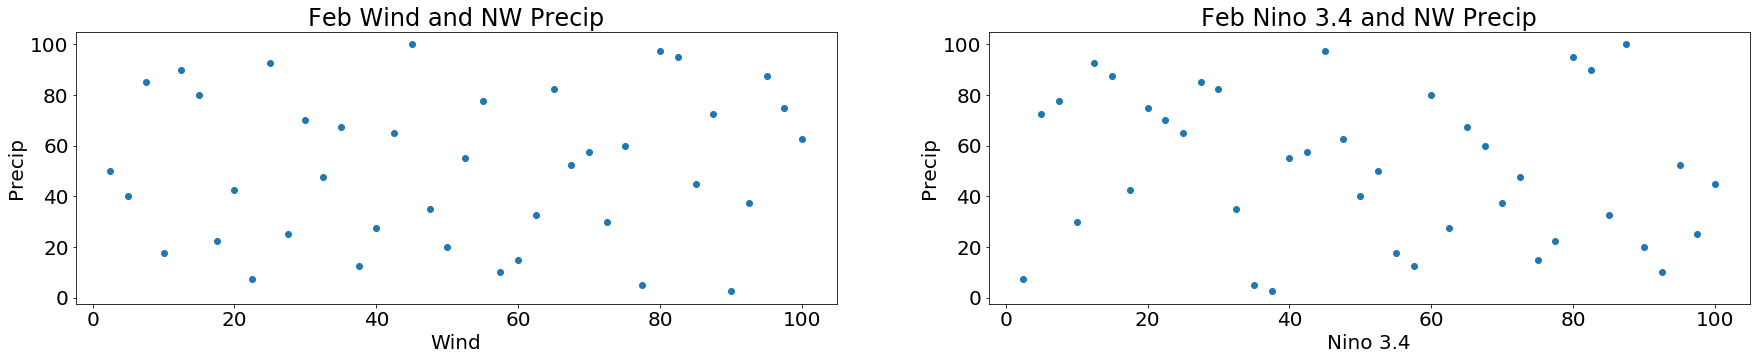

In [40]:
font = { 'family' : 'normal',
         'size'   : 20 }
plt.rc('font', **font)

month=["Nov","Dec","Jan","Feb"]
preciplistnw=[novpnw,decpnw,janpnw,febpnw]
windlist=[novw,decw,janw,febw]
sstlist=[novsst,decsst,jansst,febsst]
for i in range(4):
    fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(30,5))
    ax1.scatter(percentilefun(preciplistnw[i]),percentilefun(windlist[i].ugrdprs))
    ax2.scatter(percentilefun(preciplistnw[i]),percentilefun(sstlist[i].sst))
    ax1.set_title(month[i]+' Wind and NW Precip')
    ax1.set_xlabel('Wind')
    ax1.set_ylabel('Precip')
    ax2.set_title(month[i]+' Nino 3.4 and NW Precip')
    ax2.set_xlabel('Nino 3.4')
    ax2.set_ylabel('Precip')

The Northwest plots do not show signifigant asosications between wind and precipiation or Nino 3.4 and precipiation.

NW boxplplots

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


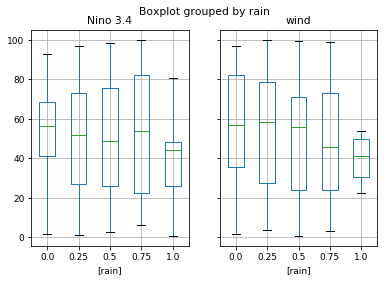

In [41]:
font = { 'family' : 'normal',
         'size'   : 9 }
plt.rc('font', **font)
raindfnw=pd.DataFrame({"rain":np.reshape(percentilebin(winterpnw),(160,)),"Nino 3.4":percentilefun(wintersst.sst),"wind":percentilefun(winterw.ugrdprs)})
raindfsw=pd.DataFrame({"rain":np.reshape(percentilebin(winterpsw),(160,)),"Nino 3.4":percentilefun(wintersst.sst),"wind":percentilefun(winterw.ugrdprs)})

rrstnw=pd.DataFrame({"rain":np.reshape(percentilefun(winterpnw),(160,)),"Nino 3.4":percentilebin(wintersst.sst)})
rwnw=pd.DataFrame({"rain":np.reshape(percentilefun(winterpnw),(160,)),"wind":percentilebin(winterw.ugrdprs)})
rrstsw=pd.DataFrame({"rain":np.reshape(percentilefun(winterpsw),(160,)),"Nino 3.4":percentilebin(wintersst.sst)})
rwsw=pd.DataFrame({"rain":np.reshape(percentilefun(winterpsw),(160,)),"wind":percentilebin(winterw.ugrdprs)})
boxplot = raindfnw.boxplot(by='rain')

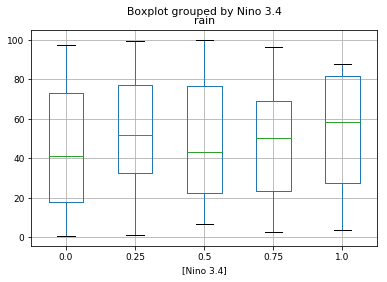

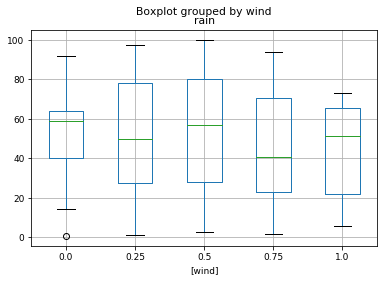

In [42]:
boxplot=rrstnw.boxplot(by='Nino 3.4')
boxplot=rwnw.boxplot(by='wind')

The northwest region boxplots do not show any signifigant associations. 

SW boxplots

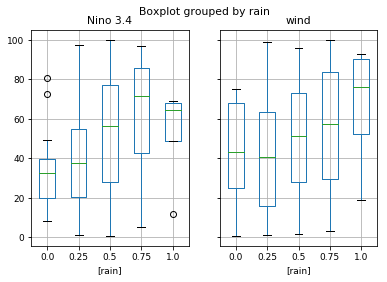

In [43]:
boxplot = raindfsw.boxplot(by='rain')

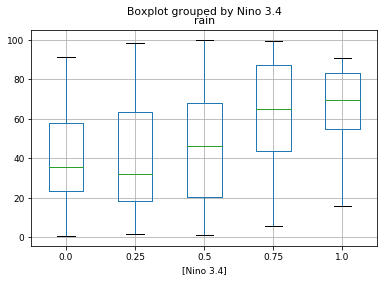

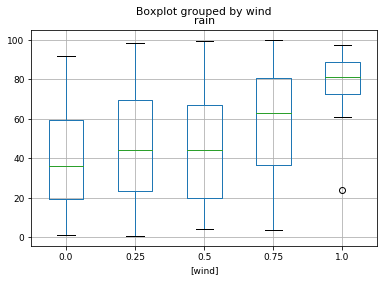

In [44]:
boxplot=rrstsw.boxplot(by='Nino 3.4')
boxplot=rwsw.boxplot(by='wind')

Both of the southwest boxplots show a slight possitive association.  

Comparing rain levels over time in the three locations:

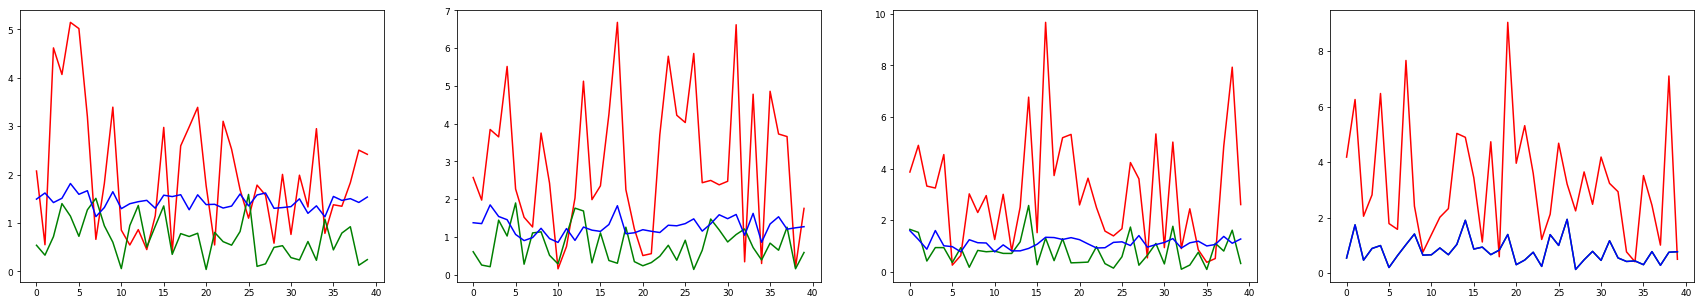

In [45]:
preciplistsw=[novpsw,decpsw,janpsw,febpsw]
preciplistnw=[novpnw,decpnw,janpnw,febpsw]
preciplist=[novp,decp,janp,febp]
windlist=[novw,decw,janw,febw]
sstlist=[novsst,decsst,jansst,febsst]
month=["Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(30,5))
axes=[ax1,ax2,ax3,ax4]
for i,j in enumerate(monthnum):
    axes[i].plot(preciplist[i],color="red")
    axes[i].plot(preciplistsw[i],color="green")
    axes[i].plot(preciplistnw[i],color="blue")

Californiahas much higher rain values than that of Pacific NW and the SW. We can examine the coefficient of variation to see how the scale relates to variation. 

Comparing Coefficients of variations ofr the three locations: 

In [46]:

def cv(data):
    return data.std()/data.mean()

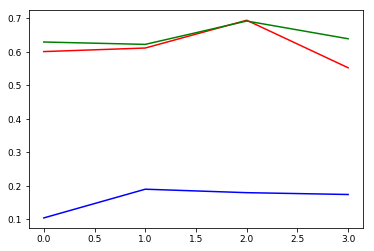

In [47]:
nwcv=np.array([cv(novpnw),cv(decpnw),cv(janpnw),cv(febpnw)])
swcv=np.array([cv(novpsw),cv(decpsw),cv(janpsw),cv(febpsw)])
ccv=np.array([cv(novp),cv(decp),cv(janp),cv(febp)])
cv(novpsw)
cv(novp)
plt.plot(nwcv,color="blue")
plt.plot(swcv,color="red")
plt.plot(ccv,color="green")

The southwest has a comparable coefficient of variation to that of california while the northwest is much lower. 

Forecast Data: Next we took a look at two different hindcast models in order to get additional data for our analysis


EMC Forecast Data 

In [48]:
def openlink(typeof):
    if typeof=="EMC":
        precipforcasturl = "http://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.EMC/.GEFS/.hindcast/.pr/L/2.5/31.5/RANGEEDGES/%5BL%5D/average/X/-130.25/-99.75/RANGE/Y/24.75/50.25/RANGE/dods "
        sstforecasturl="http://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.EMC/.GEFS/.hindcast/.ts/L/2.5/31.5/RANGEEDGES/%5BL%5Daverage/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES/dods "
        windforcasturl="http://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.EMC/.GEFS/.hindcast/.ua/L/2.5/31.5/RANGEEDGES/%5BL%5D/average/X/220/240/RANGE/Y/27/40/RANGE/[X/Y]average/dods"
    else:
        precipforcasturl = "http://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.ESRL/.FIMr1p1/.hindcast/.pr/L/2.5/31.5/RANGEEDGES/%5BL%5D/average/X/-130.25/-99.75/RANGE/Y/24.75/50.25/RANGE/dods "
        sstforecasturl="http://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.ESRL/.FIMr1p1/.hindcast/.ts/L/2.5/31.5/RANGEEDGES/%5BL%5Daverage/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES/dods "
        windforcasturl="http://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.ESRL/.FIMr1p1/.hindcast/.ua/L/2.5/31.5/RANGEEDGES/%5BL%5D/average/X/220/240/RANGE/Y/27/40/RANGE/[X/Y]average/dods"
    return(precipforcasturl,sstforecasturl,windforcasturl)

In [49]:
rainforcast=xr.open_dataset(openlink("EMC")[0], chunks={'S': 100})
sstforcast=xr.open_dataset(openlink("EMC")[1], chunks={'S': 100})




In [50]:
windforcast=xr.open_dataset(openlink("EMC")[2],chunks={"S":100})

In [51]:
rainforcast_emc=rainforcast.sel(M=[1.0,2.0,3.0,4.0])

In [52]:
windforcast_emc=windforcast.sel(P=200)



In [53]:
windforcast_emc

<xarray.Dataset>
Dimensions:  (M: 11, S: 939)
Coordinates:
    P        int32 200
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2016-12-21 2016-12-28
  * M        (M) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
Data variables:
    ua       (S, M) float64 dask.array<shape=(939, 11), chunksize=(100, 11)>
Attributes:
    Conventions:  IRIDL

In [54]:
sstforcast_emc=sstforcast.mean(["X","Y"])

In [55]:
windforcast_emc=windforcast_emc.sel(M=[1.0,2.0,3.0,4.0])
windforcast_emc

<xarray.Dataset>
Dimensions:  (M: 4, S: 939)
Coordinates:
    P        int32 200
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2016-12-21 2016-12-28
  * M        (M) float32 1.0 2.0 3.0 4.0
Data variables:
    ua       (S, M) float64 dask.array<shape=(939, 4), chunksize=(100, 4)>
Attributes:
    Conventions:  IRIDL

In [56]:
sstforcast_emc=sstforcast_emc.sel(M=[1.0,2.0,3.0,4.0])
sstforcast_emc

<xarray.Dataset>
Dimensions:  (M: 4, S: 939)
Coordinates:
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2016-12-21 2016-12-28
  * M        (M) float32 1.0 2.0 3.0 4.0
Data variables:
    ts       (S, M) float64 dask.array<shape=(939, 4), chunksize=(100, 4)>

In [57]:
td = np.timedelta64(15,'D')
T=np.array(sstforcast_emc.coords["S"])+td
M=np.array(sstforcast_emc.coords["M"])

In [58]:
p_emc_array=np.array(rainforcast_emc.pr)

In [59]:
sst_emc_array=np.array(sstforcast_emc.ts)

In [60]:
ua_emc=np.array(windforcast_emc.ua)

In [61]:
pforcast_emc_adjtime= xr.Dataset(data_vars={'pr':  (('T', 'M','Y','X'), p_emc_array)},coords={'T': np.array(rainforcast_emc.coords["S"])+td,'M': np.array(rainforcast_emc.coords["M"]),'Y':rainforcast_emc.coords["Y"],'X':rainforcast_emc.coords["X"]},)


In [62]:
wforcast_emc_adjtime= xr.Dataset(data_vars={'ua':  (('T', 'M'), windforcast_emc.ua)},coords={'T': np.array(windforcast_emc.coords["S"])+td,'M':np.array(windforcast_emc.coords["M"])},)


In [63]:
sstforcast_emc_adjtime= xr.Dataset(data_vars={'ts':  (('T', 'M'), sst_emc_array)},coords={'T': np.array(sstforcast_emc.coords["S"])+td,'M': np.array(sstforcast_emc.coords["M"])},)

In [64]:
sstforcast_emc_adjtime=sstforcast_emc_adjtime.sel(M=[1.0,2.0,3.0,4.0])

In [65]:
precipanom_emcforecast=pforcast_emc_adjtime.groupby("T.month")-pforcast_emc_adjtime.groupby("T.month").mean("T")
sstforcast_emc_adjtime=sstforcast_emc_adjtime.groupby("T.month")-sstforcast_emc_adjtime.groupby("T.month").mean("T")
Spn_emc=(precipanom_emcforecast.pr*sstforcast_emc_adjtime.ts).groupby("T.month").mean(["T","M"])
Sn_emc = sstforcast_emc_adjtime.ts.groupby('T.month').std(['T',"M"])
Sp_emc = precipanom_emcforecast.pr.groupby('T.month').std(['T',"M"])
Cpn_emc = Spn_emc/Sn_emc/Sp_emc
windanom_emcforecast=wforcast_emc_adjtime.groupby("T.month")-wforcast_emc_adjtime.groupby("T.month").mean("T")
Swn_emc=(windanom_emcforecast.ua*sstforcast_emc_adjtime.ts).groupby("T.month").mean(["T","M"])
Sw_emc = windanom_emcforecast.ua.groupby('T.month').std(['T',"M"])
Cwn_emc=Swn_emc/Sn_emc/Sw_emc

Spw_emc=(windanom_emcforecast.ua*precipanom_emcforecast.pr).groupby("T.month").mean(["T","M"])
Cpw_emc=Spw_emc/Sw_emc/Sp_emc

EMC Forecast Data Correlation Plots: 

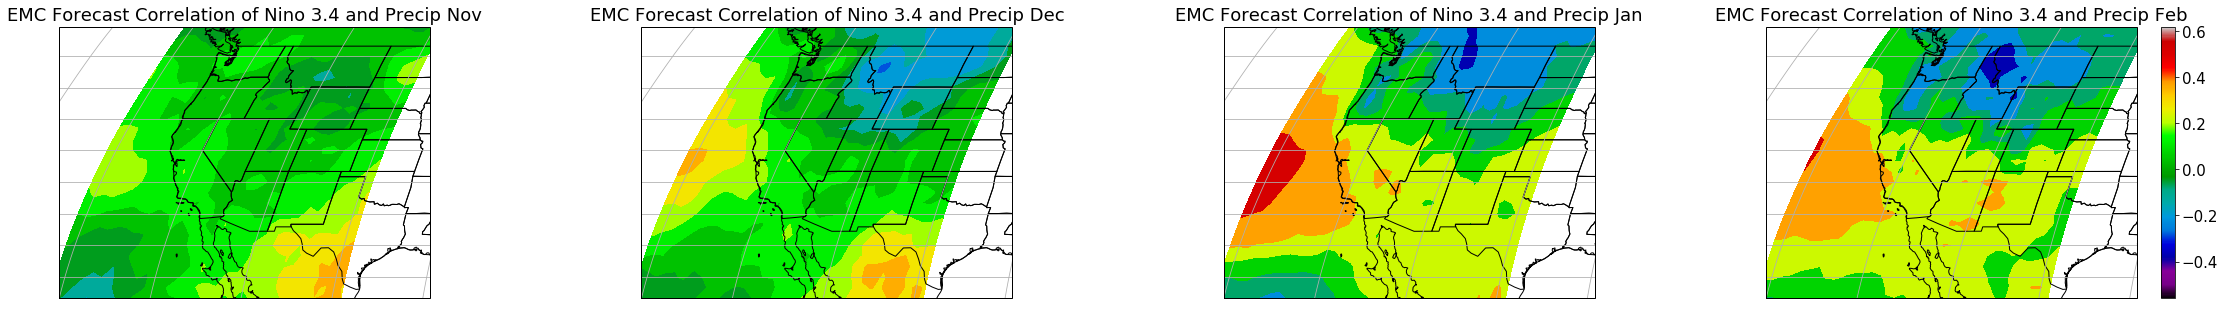

In [66]:
font = { 'family' : 'normal',
         'size'   : 15 }
plt.rc('font', **font)
minlist=[]
maxlist=[]
for i in [10,11,0,1]:
    minlist.append(np.min(Cpn_emc[i]))
    maxlist.append(np.max(Cpn_emc[i]))

month=["Nov","Dec","Jan","Feb"]
monthnum=[10,11,0,1]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(40,5))
minim_cpn_emc=np.min(minlist)
maxim_cpn_emc=np.max(maxlist)
for i,j in enumerate([ax1,ax2,ax3,ax4]):
    plotmap(Cpn_emc[monthnum[i]],"EMC Forecast Correlation of Nino 3.4 and Precip "+month[i],minim_cpn,maxim_cpn,"one",ax=j,colorbar="nonauto")
plt.imshow(Cpn_emc[monthnum[i]],vmin=minim_cpn,vmax=maxim_cpn,cmap='nipy_spectral')
plt.colorbar()
plt.show()

You can see the correlation values between Nino 3.4 and precipiation are higher in the water than in the state of California. Also recall that the value for signifigance is lower here since n is larger $\frac{2}{\sqrt{4(70)}}=.12$ You see larger regions of signifigance in January and February. 

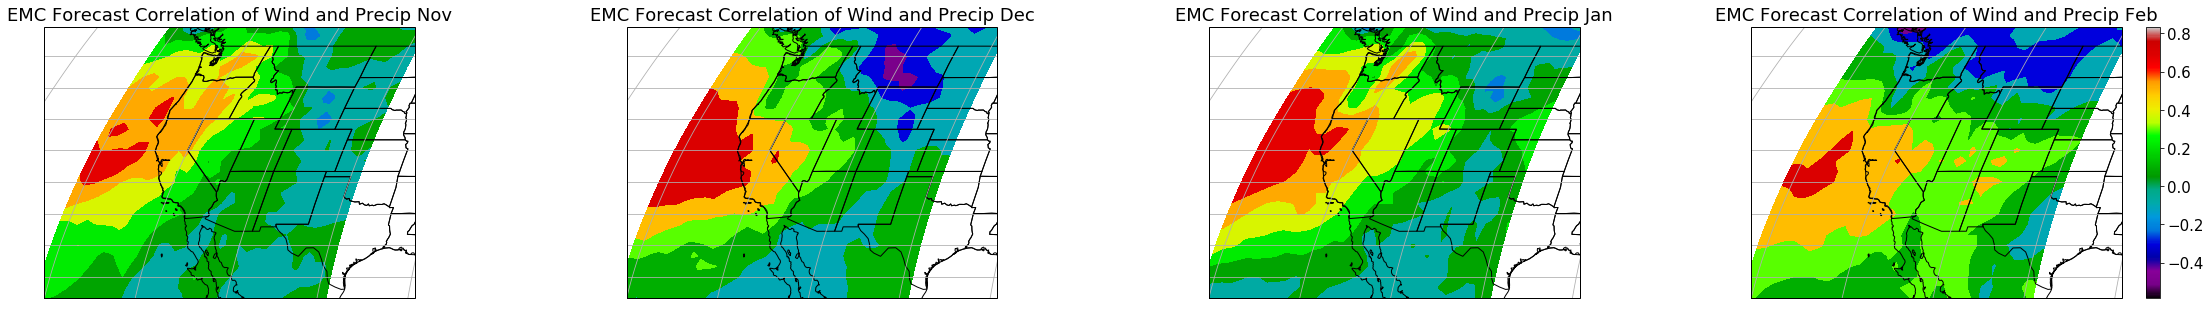

In [67]:
font = { 'family' : 'normal',
         'size'   : 15 }
plt.rc('font', **font)
minlist=[]
maxlist=[]
for i in [10,11,0,1]:
    minlist.append(np.min(Cpw[i]))
    maxlist.append(np.max(Cpw[i]))

month=["Nov","Dec","Jan","Feb"]
monthnum=[10,11,0,1]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(40,5))
minim_cpw_emc=np.min(minlist)
maxim_cpw_emc=np.max(maxlist)
for i,j in enumerate([ax1,ax2,ax3,ax4]):
    plotmap(Cpw_emc[monthnum[i]],"EMC Forecast Correlation of Wind and Precip "+month[i],minim_cpw,maxim_cpw,"one",ax=j,colorbar="nonauto")
plt.imshow(Cpw_emc[monthnum[i]],vmin=minim_cpw,vmax=maxim_cpw,cmap='nipy_spectral')
plt.colorbar()
plt.show()


Coefficient values are much larger between wind and precipiation than that of Nino 3.4 and precipiation. The forecast data does follow a similar pattern however with larger values in the water with the appearance of spreading towards land. 

In [68]:
#A linear algebra regression function 
def regress(a,b):
    A=np.matmul(np.transpose(a),a)
    B=np.matmul(np.transpose(a),b)
    return np.linalg.solve(A,B)
    

    
#tshape is a multiplication of other variables (4 M variables* t, the resulting matrices will be 4t long)
#dependent is the b matrix 
#indenepent is one of the a matrices
#precipiation is our constant a matrix 
# this function computes two coefficients for ax=b and correlates their respectives squared errors 


def partialcorr2(dependent,independent,precip,month,shape,tshape):
    error1=np.empty((shape[0],shape[1],tshape*4))
    b2=dependent
    a=np.ones((tshape*4,2))
    for k,m in enumerate([1.0,2.0,3.0,4.0]):
            a[k*tshape:(k+1)*tshape,0]=np.array(independent.sel(M=m))
    if shape==(52,62):
        x,y=getlonlat("half")
    else:
         x,y=getlonlat("one")
    for i in range(shape[1]):
        for j in range(shape[0]):
            b_array1=np.ones((tshape*4))
            for k,m in enumerate([1.0,2.0,3.0,4.0]):
                b_array1[k*tshape:(k+1)*tshape]=np.array(precip.sel(Y=y[j],X=x[i],M=m))
            x1=regress(a,b_array1) 
            error1[j,i,:]=np.square(b_array1-np.matmul(a,x1))
    b_array2=np.ones((tshape*4))
    for k,m in enumerate([1.0,2.0,3.0,4.0]):
        b_array2[k*tshape:(k+1)*tshape]=np.array(b2.sel(M=m))
    x2=regress(a,b_array2)
    error2=np.square(b_array2-np.matmul(a,x2))
    pc=np.empty(shape)
    for i in range(shape[1]):
        for j in range(shape[0]):
            pc[j,i]=np.corrcoef(error1[j,i,:],error2)[0,1]
    return pc
        
        


In [69]:
wind_nov=np.array(windforcast_emc.sel(S=windforcast_emc["S.month"]==11).ua)
sst_nov=np.array(sstforcast_emc.sel(S=sstforcast_emc["S.month"]==11).ts)
pmonth=pforcast_emc_adjtime.sel(T=pforcast_emc_adjtime["T.month"]==11)
p_nov=pmonth - pmonth.mean('T')

**MISSING WIND VALUES**

In [70]:
wind_nov

array([[        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [21.04151965, 25.84047668, 22.3279936 , 17.86212048],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [21.56962622, 33.82390084, 21.47403666, 18.87627012],
       [32.01364001, 29.5234359 , 30.86577153, 27.70319774],
       [26.69357189, 15.4689232 , 28.89574885, 21.4876308 ],
       [26.23416147, 33.

In [71]:
minlist=[]
maxlist=[]
for i in [11,12,1,2]:
    sst=getmonth(sstforcast_emc_adjtime,i).ts
    rain=getmonth(pforcast_emc_adjtime,i).pr-getmonth(pforcast_emc_adjtime,i).pr.mean("T")
    sst=sst-sst.mean("T")
    windds=getmonth(wforcast_emc_adjtime,i).ua-getmonth(wforcast_emc_adjtime,i).ua.mean("T")
    minlist.append(np.nanmin(partialcorr2(sst,windds,rain,"one",(28,33),np.shape(windds)[0])))
    maxlist.append(np.nanmax(partialcorr2(sst,windds,rain,"one",(28,33),np.shape(windds)[0])))

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: All-NaN slice encountered
  if __name__ == '__main__':
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: All-NaN slice encountered
  if __name__ == '__main__':
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: All-NaN slice encountered
  if __name__ == '__main__':
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  
/Users/brigidlynch/anaconda3/lib/

Partial Correlation/Correlation Comparison 

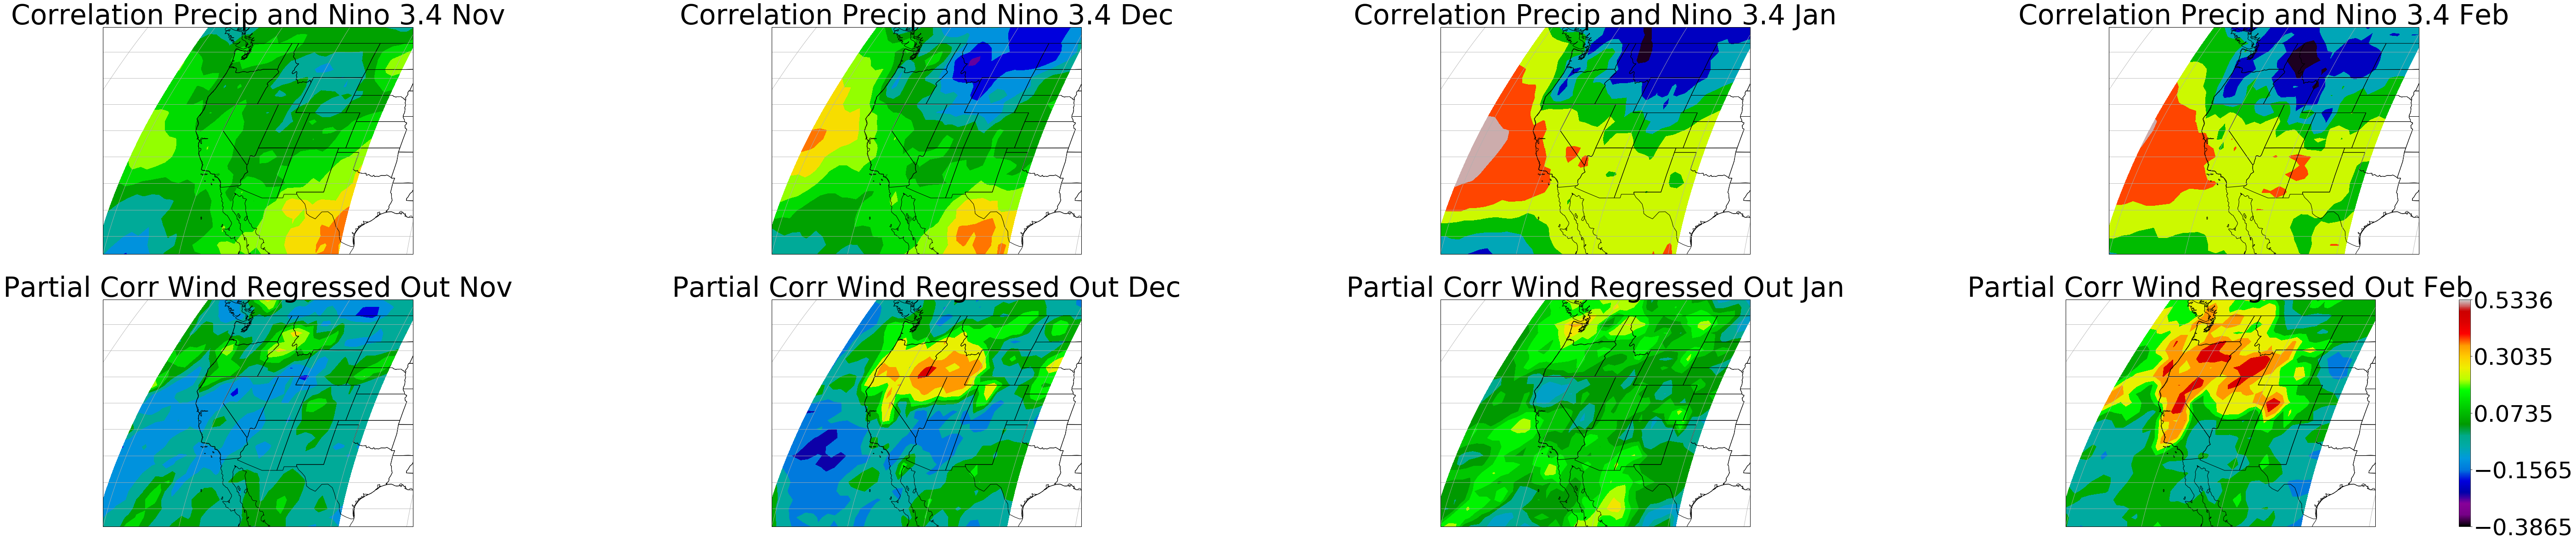

In [72]:
font = { 'family' : 'normal',
         'size'   : 50 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb","Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2,11,12,1,2]
fig, ax = plt.subplots(ncols=4,nrows=2,subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(100,20))
ax=np.reshape(ax,(8))
[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]=ax
minim_dual1_emc=min(minim_cpn_emc,min(minlist))
maxim_dual1_emc=max(maxim_cpn_emc,max(maxlist))
title_data=["Correlation Precip and Nino 3.4 ","Partial Corr Wind Regressed Out "]
#for row in [0,1]:
for i,j in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]):
    pmonth=pforcast_emc_adjtime.sel(T=pforcast_emc_adjtime["T.month"]==monthnum[i])
    rainanom=pmonth - pmonth.mean('T')
    rainanom=rainanom.pr
    wmonth=wforcast_emc_adjtime.sel(T=wforcast_emc_adjtime["T.month"]==monthnum[i]).ua
    sstmonth=sstforcast_emc_adjtime.sel(T=sstforcast_emc_adjtime["T.month"]==monthnum[i])
    sstmonth=sstmonth-sstmonth.mean("T")
    sstmonth=sstmonth.ts
    windanom=wmonth-wmonth.mean("T")
    sstmonth=sstmonth[~np.isnan(windanom).any(axis=1)]
    rainanom=rainanom[~np.isnan(windanom).any(axis=1)]
    windanom=windanom[~np.isnan(windanom).any(axis=1)]
    datas=[Cpn_emc[monthnum[i]-1],partialcorr2(sstmonth,windanom,rainanom,1,(28,33),np.shape(windanom)[0])]
    if i<4:
        data=datas[0]
        plotmap(data,title_data[0]+month[i],minim_dual1_emc,maxim_dual1_emc,resolution="one",ax=j,colorbar="nonauto")
    else:
        data=datas[1]
        plotmap(data,title_data[1]+month[i],minim_dual1_emc,maxim_dual1_emc,resolution="one",ax=j,colorbar="nonauto")  
plt.imshow(data,vmin=minim_dual1_emc,vmax=maxim_dual1_emc,cmap='nipy_spectral')
plt.colorbar(pad=.15,ticks=np.linspace(minim_dual1_emc,maxim_dual1_emc,5))
plt.show()

Correlation appears to be strengthened when wind is regressed out for the months of December and February. In these plots there is a less visible relationship between partial correlation and correlation. 

Text(0.5, 1.0, 'Nino 3.4 and Wind Correlation EMC ')

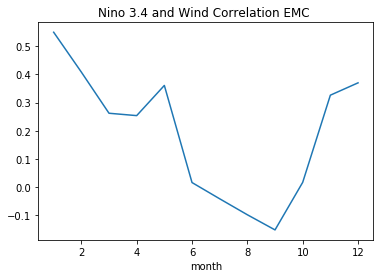

In [73]:
font = { 'family' : 'normal',
         'size'   : 10 }
plt.rc('font', **font)
windanom=wforcast_emc_adjtime.groupby("T.month")-wforcast_emc_adjtime.groupby("T.month").mean("T")
sstanom=sstforcast_emc_adjtime.groupby("T.month")-sstforcast_emc_adjtime.groupby("T.month").mean("T")
Swn=(windanom.ua*sstanom.ts).groupby("T.month").mean(["T","M"])
Sw = windanom.ua.groupby('T.month').std(['T','M'])
Sn = sstanom.ts.groupby('T.month').std(['T',"M"])
Cwn=Swn/Sn/Sw

Cwn.plot()
plt.title("Nino 3.4 and Wind Correlation EMC ")

Wind and Nino 3.4 correlation varies greatly month by month, peaking in January April and December with relatively high values in February March and November. 

Text(0, 0.5, 'Nino 3.4')

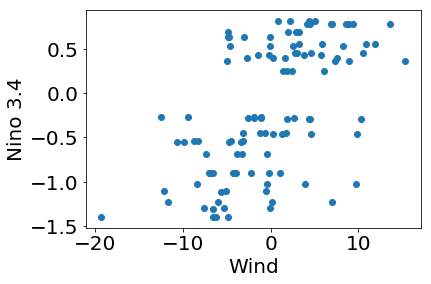

In [74]:
font = { 'family' : 'normal',
         'size'   : 20 }
plt.rc('font', **font)
wmonth=wforcast_emc_adjtime.sel(T=wforcast_emc_adjtime["T.month"]==2).ua
sstmonth=sstforcast_emc_adjtime.sel(T=sstforcast_emc_adjtime["T.month"]==2)
sstmonth=sstmonth-sstmonth.mean("T")
sstmonth=sstmonth.ts
windanom=wmonth-wmonth.mean("T")
sstmonth=sstmonth[~np.isnan(windanom).any(axis=1)]
windanom=windanom[~np.isnan(windanom).any(axis=1)]
plt.scatter(windanom,sstmonth)
plt.xlabel("Wind")
plt.ylabel("Nino 3.4")

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: All-NaN slice encountered
  if __name__ == '__main__':
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: All-NaN slice encountered
  if __name__ == '__main__':
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: All-NaN slice encountered
  if __name__ == '__main__':
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  
/Users/brigidlynch/anaconda3/lib/

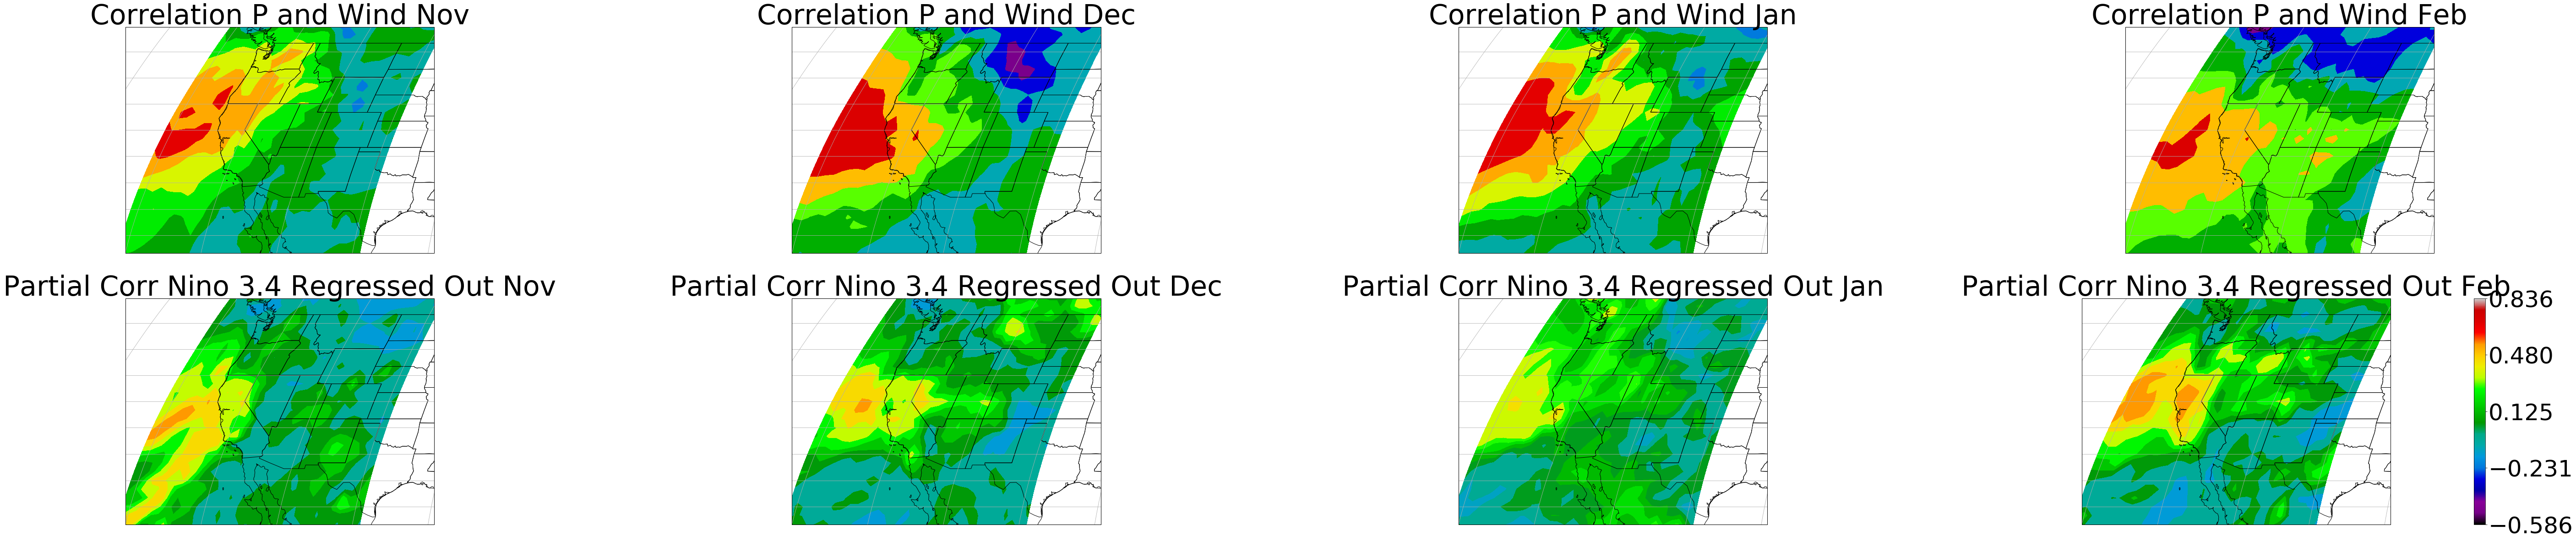

In [110]:
minlist=[]
maxlist=[]
for i in [11,12,1,2]:
    sst=getmonth(sstforcast_emc_adjtime,i).ts
    rain=getmonth(pforcast_emc_adjtime,i).pr-getmonth(pforcast_emc_adjtime,i).pr.mean("T")
    sst=sst-sst.mean("T")
    windds=getmonth(wforcast_emc_adjtime,i).ua-getmonth(wforcast_emc_adjtime,i).ua.mean("T")
    minlist.append(np.nanmin(partialcorr2(sst,windds,rain,"one",(28,33),np.shape(windds)[0])))
    maxlist.append(np.nanmax(partialcorr2(sst,windds,rain,"one",(28,33),np.shape(windds)[0])))
font = { 'family' : 'normal',
         'size'   : 50 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb","Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2,11,12,1,2]
fig, ax = plt.subplots(ncols=4,nrows=2,subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(100,20))
ax=np.reshape(ax,(8))
[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]=ax
minim_dual2_emc=min(minim_cpw_emc,min(minlist))
maxim_dual2_emc=max(maxim_cpw_emc,max(maxlist))
title_data=["Correlation P and Wind ","Partial Corr Nino 3.4 Regressed Out "]
#for row in [0,1]:
for i,j in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]):
    pmonth=pforcast_emc_adjtime.sel(T=pforcast_emc_adjtime["T.month"]==monthnum[i])
    rainanom=pmonth - pmonth.mean('T')
    rainanom=rainanom.pr
    wmonth=wforcast_emc_adjtime.sel(T=wforcast_emc_adjtime["T.month"]==monthnum[i]).ua
    sstmonth=sstforcast_emc_adjtime.sel(T=sstforcast_emc_adjtime["T.month"]==monthnum[i])
    sstmonth=sstmonth-sstmonth.mean("T")
    sstmonth=sstmonth.ts
    windanom=wmonth-wmonth.mean("T")
    sstmonth=sstmonth[~np.isnan(windanom).any(axis=1)]
    rainanom=rainanom[~np.isnan(windanom).any(axis=1)]
    windanom=windanom[~np.isnan(windanom).any(axis=1)]
    datas=[Cpw_emc[monthnum[i]-1],partialcorr2(windanom,sstmonth,rainanom,1,(28,33),np.shape(windanom)[0])]
    if i<4:
        data=datas[0]
        plotmap(data,title_data[0]+month[i],minim_dual2_emc,maxim_dual2_emc,resolution="one",ax=j,colorbar="nonauto")
    else:
        data=datas[1]
        plotmap(data,title_data[1]+month[i],minim_dual2_emc,maxim_dual2_emc,resolution="one",ax=j,colorbar="nonauto")  
plt.imshow(data,vmin=minim_dual2_emc,vmax=maxim_dual2_emc,cmap='nipy_spectral')
plt.colorbar(pad=.15,ticks=np.linspace(minim_dual2_emc,maxim_dual2_emc,5))
plt.show()

Wind partial correlation values follow a very similar pattern to that of correlation, the values are just smaller yet still signifigant( >.12) in California

ESRL FIM Forecast Data 

In [91]:
rainforcast=xr.open_dataset(openlink("other")[0], chunks={'S': 100})
sstforcast=xr.open_dataset(openlink("other")[1], chunks={'S': 100})
windforcast=xr.open_dataset(openlink("other")[2],chunks={"S":100})

In [92]:
windforcast=windforcast.sel(P=200)

In [93]:
sstforcast=sstforcast.mean(["X","Y"])

In [94]:
td = np.timedelta64(15,'D')

In [95]:
T=np.array(sstforcast.coords["S"])+td

In [96]:
M=np.array(sstforcast.coords["M"])


In [134]:
pforcast_adjtime= xr.Dataset(data_vars={'pr':    (('T', 'M','Y','X'), rainforcast.pr)},coords={'T': T,'M': M,'Y':rainforcast.coords["Y"],'X':rainforcast.coords["X"]},)

In [135]:
pforcast_adjtime.pr

<xarray.DataArray 'pr' (T: 965, M: 4, Y: 28, X: 33)>
array([[[[1.657809e-06, ..., 1.620936e-05],
         ...,
         [6.700007e-05, ..., 1.134745e-05]],

        ...,

        [[1.699113e-06, ..., 9.422279e-06],
         ...,
         [8.354603e-05, ..., 1.009315e-05]]],


       ...,


       [[[8.266181e-06, ..., 9.080631e-06],
         ...,
         [4.237890e-06, ..., 1.983698e-05]],

        ...,

        [[3.122247e-06, ..., 7.422544e-06],
         ...,
         [9.848825e-06, ..., 1.774924e-05]]]])
Coordinates:
  * T        (T) datetime64[ns] 1999-01-21 1999-01-28 ... 2017-07-06 2017-07-13
  * M        (M) float32 1.0 2.0 3.0 4.0
  * Y        (Y) float32 24.0 25.0 26.0 27.0 28.0 ... 47.0 48.0 49.0 50.0 51.0
  * X        (X) float32 -131.0 -130.0 -129.0 -128.0 ... -101.0 -100.0 -99.0

In [98]:
wforcast_adjtime= xr.Dataset(data_vars={'ua':  (('T', 'M'), windforcast.ua)},coords={'T': T,'M':M},)
sstforcast_adjtime= xr.Dataset(data_vars={'ts':  (('T', 'M'), sstforcast.ts)},coords={'T': T,'M': M},)

In [99]:
precipanom_forecast=pforcast_adjtime.groupby("T.month")-pforcast_adjtime.groupby("T.month").mean("T")
sstanom_forecast=sstforcast_adjtime.groupby("T.month")-sstforcast_adjtime.groupby("T.month").mean("T")
Spn_for=(precipanom_forecast.pr*sstanom_forecast.ts).groupby("T.month").mean(["T","M"])
Sn_for = sstanom_forecast.ts.groupby('T.month').std(['T',"M"])
Sp_for = precipanom_forecast.pr.groupby('T.month').std(['T',"M"])
Cpn_for = Spn_for/Sn_for/Sp_for
windanom_forecast=wforcast_adjtime.groupby("T.month")-wforcast_adjtime.groupby("T.month").mean("T")
Swn_for=(windanom_forecast.ua*sstforcast_adjtime.ts).groupby("T.month").mean(["T","M"])
Sw_for = windanom_forecast.ua.groupby('T.month').std(['T',"M"])
Cwn_for=Swn_for/Sn_for/Sw_for

Spw_for=(windanom_forecast.ua*precipanom_forecast.pr).groupby("T.month").mean(["T","M"])
Cpw_for=Spw_for/Sw_for/Sp_for

Correlation and Partial Correlation Plots: 

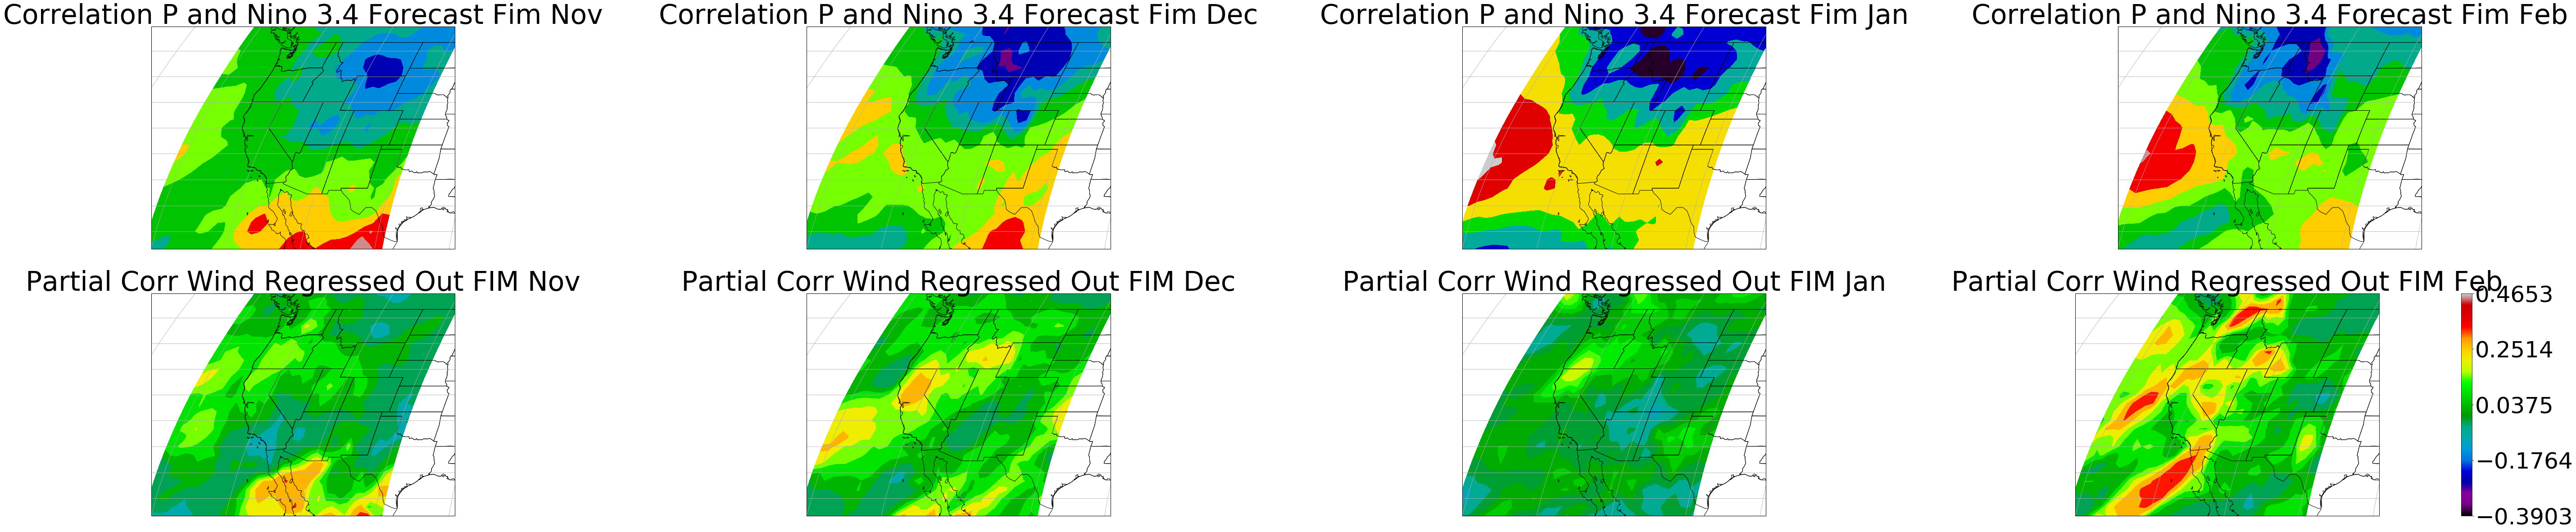

In [102]:
minlist=[]
maxlist=[]
for i in [10,11,0,1]:
    minlist.append(np.min(Cpn_for[i]))
    maxlist.append(np.max(Cpn_for[i]))
minim_cpn_for=min(minlist)
maxim_cpn_for=max(maxlist)

minlist=[]
maxlist=[]
for i in [11,12,1,2]:
    sst=getmonth(sstforcast_adjtime,i).ts
    rain=getmonth(pforcast_adjtime,i).pr-getmonth(pforcast_adjtime,i).pr.mean("T")
    sst=sst-sst.mean("T")
    windds=getmonth(wforcast_adjtime,i).ua-getmonth(wforcast_adjtime,i).ua.mean("T")
    minlist.append(np.nanmin(partialcorr2(sst,windds,rain,"one",(28,33),np.shape(windds)[0])))
    maxlist.append(np.nanmax(partialcorr2(sst,windds,rain,"one",(28,33),np.shape(windds)[0])))
font = { 'family' : 'normal',
         'size'   : 50 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb","Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2,11,12,1,2]
fig, ax = plt.subplots(ncols=4,nrows=2,subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(100,20))
ax=np.reshape(ax,(8))
[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]=ax
minim_dual1_for=min(minim_cpn_for,min(minlist))
maxim_dual1_for=max(maxim_cpn_for,max(maxlist))
title_data=["Correlation P and Nino 3.4 Forecast Fim ","Partial Corr Wind Regressed Out FIM "]
#for row in [0,1]:
for i,j in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]):
    pmonth=pforcast_adjtime.sel(T=pforcast_adjtime["T.month"]==monthnum[i])
    rainanom=pmonth - pmonth.mean('T')
    rainanom=rainanom.pr
    wmonth=wforcast_adjtime.sel(T=wforcast_adjtime["T.month"]==monthnum[i]).ua
    sstmonth=sstforcast_adjtime.sel(T=sstforcast_adjtime["T.month"]==monthnum[i])
    sstmonth=sstmonth-sstmonth.mean("T")
    sstmonth=sstmonth.ts
    windanom=wmonth-wmonth.mean("T")
    sstmonth=sstmonth[~np.isnan(windanom).any(axis=1)]
    rainanom=rainanom[~np.isnan(windanom).any(axis=1)]
    windanom=windanom[~np.isnan(windanom).any(axis=1)]
    datas=[Cpn_for[monthnum[i]-1],partialcorr2(sstmonth,windanom,rainanom,1,(28,33),np.shape(windanom)[0])]
    if i<4:
        data=datas[0]
        plotmap(data,title_data[0]+month[i],minim_dual1_for,maxim_dual1_for,resolution="one",ax=j,colorbar="nonauto")
    else:
        data=datas[1]
        plotmap(data,title_data[1]+month[i],minim_dual1_for,maxim_dual1_for,resolution="one",ax=j,colorbar="nonauto")  
plt.imshow(data,vmin=minim_dual1_for,vmax=maxim_dual1_for,cmap='nipy_spectral')
plt.colorbar(pad=.15,ticks=np.linspace(minim_dual1_for,maxim_dual1_for,5))
plt.show()

For the Fim data set, January and February show higher correlation values than December and November in California. Partial correlation (wind regressed out) does not show many patterns however there are higher values in February and December.

Text(0.5, 1.0, 'Correlation between Wind and Nino 3.4')

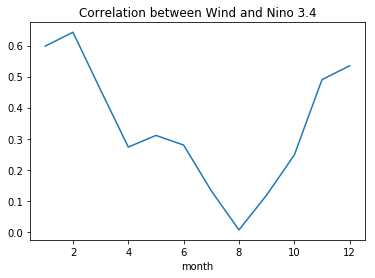

In [106]:
font = { 'family' : 'normal',
         'size'   : 10 }
plt.rc('font', **font)
windanom=wforcast_adjtime.groupby("T.month")-wforcast_adjtime.groupby("T.month").mean("T")
sstanom=sstforcast_adjtime.groupby("T.month")-sstforcast_adjtime.groupby("T.month").mean("T")
Swn=(windanom.ua*sstanom.ts).groupby("T.month").mean(["T","M"])
Sw = windanom.ua.groupby('T.month').std(['T','M'])
Sn = sstanom.ts.groupby('T.month').std(['T',"M"])
Cwn_for=Swn/Sn/Sw

Cwn_for.plot()
plt.title("Correlation between Wind and Nino 3.4")

Nino wind correlations peak in February and are also relatively high from Oct-Dec

Text(0, 0.5, 'Nino 3.4')

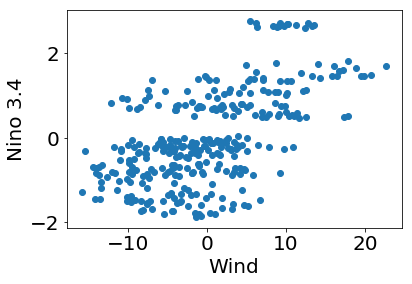

In [108]:
font = { 'family' : 'normal',
         'size'   : 20 }
plt.rc('font', **font)
wmonth=wforcast_adjtime.sel(T=wforcast_adjtime["T.month"]==1)
sstmonth=sstforcast_adjtime.sel(T=sstforcast_adjtime["T.month"]==1)
sstmonth=sstmonth-sstmonth.mean("T")
windanom=wmonth-wmonth.mean("T")
plt.scatter(windanom.ua,sstmonth.ts)
plt.xlabel("Wind")
plt.ylabel("Nino 3.4")

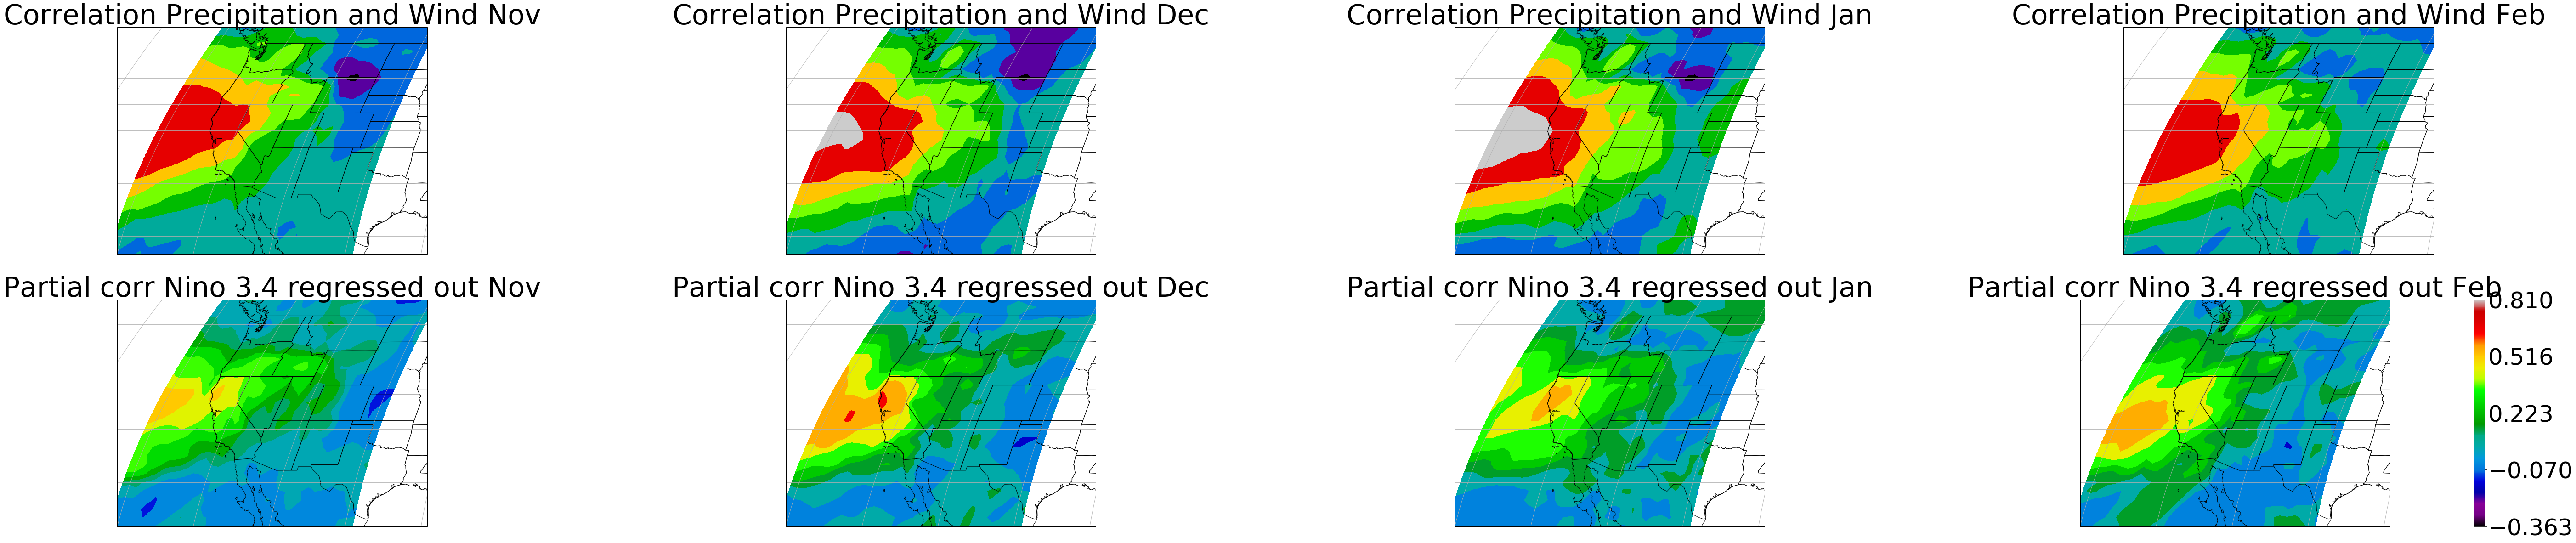

In [109]:
minlist=[]
maxlist=[]
for i in [10,11,0,1]:
    minlist.append(np.min(Cpw_for[i]))
    maxlist.append(np.max(Cpw_for[i]))
minim_cpw_for=min(minlist)
maxim_cpw_for=max(maxlist)
minlist=[]
maxlist=[]
for i in [11,12,1,2]:
    sst=getmonth(sstforcast_adjtime,i).ts
    rain=getmonth(pforcast_adjtime,i).pr-getmonth(pforcast_adjtime,i).pr.mean("T")
    sst=sst-sst.mean("T")
    windds=getmonth(wforcast_adjtime,i).ua-getmonth(wforcast_adjtime,i).ua.mean("T")
    minlist.append(np.nanmin(partialcorr2(windds,sst,rain,"one",(28,33),np.shape(windds)[0])))
    maxlist.append(np.nanmax(partialcorr2(windds,sst,rain,"one",(28,33),np.shape(windds)[0])))
font = { 'family' : 'normal',
         'size'   : 50 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb","Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2,11,12,1,2]
fig, ax = plt.subplots(ncols=4,nrows=2,subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(100,20))
ax=np.reshape(ax,(8))
[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]=ax
minim_dual2_for=min(minim_cpw_for,min(minlist))
maxim_dual2_for=max(maxim_cpw_for,max(maxlist))
title_data=["FIM Correlation Precipitation and Wind ","FIM Partial corr Nino 3.4 regressed out "]
#for row in [0,1]:
for i,j in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]):
    pmonth=pforcast_adjtime.sel(T=pforcast_adjtime["T.month"]==monthnum[i])
    rainanom=pmonth - pmonth.mean('T')
    rainanom=rainanom.pr
    wmonth=wforcast_adjtime.sel(T=wforcast_adjtime["T.month"]==monthnum[i]).ua
    sstmonth=sstforcast_adjtime.sel(T=sstforcast_adjtime["T.month"]==monthnum[i])
    sstmonth=sstmonth-sstmonth.mean("T")
    sstmonth=sstmonth.ts
    windanom=wmonth-wmonth.mean("T")
    sstmonth=sstmonth[~np.isnan(windanom).any(axis=1)]
    rainanom=rainanom[~np.isnan(windanom).any(axis=1)]
    windanom=windanom[~np.isnan(windanom).any(axis=1)]
    datas=[Cpw_for[monthnum[i]-1],partialcorr2(windanom,sstmonth,rainanom,1,(28,33),np.shape(windanom)[0])]
    if i<4:
        data=datas[0]
        plotmap(data,title_data[0]+month[i],minim_dual2_for,maxim_dual2_for,resolution="one",ax=j,colorbar="nonauto")
    else:
        data=datas[1]
        plotmap(data,title_data[1]+month[i],minim_dual2_for,maxim_dual2_for,resolution="one",ax=j,colorbar="nonauto")  
plt.imshow(data,vmin=minim_dual2_for,vmax=maxim_dual2_for,cmap='nipy_spectral')
plt.colorbar(pad=.15,ticks=np.linspace(minim_dual2_for,maxim_dual2_for,5))
plt.show()

Partial correlation and correlation have similar patterns, this is a pattern we have seen with the EMC forecast data, and the observational data. 